<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
# P A N D A S and N U M P Y
import numpy as np
import pandas as pd
import pandas_profiling

# P L O T T I N G 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'     #For Retina screens
%matplotlib inline

# S K L E A R N
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import SGDClassifier

# S C I P Y
import scipy.stats as stats

# P A T S Y
import patsy

# I P y t h o n
from IPython.core.display import display,HTML
display(HTML("<style>.container {width:95% !important;}</style>")) #iPython Cell Width
#plt.style.use('dark_background')

# W A R N I N G S
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)

#from myfunctions import myfunc
import myfunctions as myfunc

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

<div class="alert alert-block alert-info">
<b>Using Pandas DataFrames</b> 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.&nbsp;&nbsp;&nbsp;Use the .read_csv() function to read the csv file
</div>

In [2]:
# Load the data
df_house = pd.read_csv('./housing.csv')

<div class="alert alert-block alert-info">
<b>Find as much information from the Dataframe</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;.dtypes - Data Field Types
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;.shape - Shape
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;.info() - File Information
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;.describe() - Data Statistics (count, mean, std, min, max, 25-50-75% (Quartiles)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;.isnull() - Find Nulls
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;.columns - Display all the column names in the DataFrame 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.&nbsp;&nbsp;&nbsp;.head(10) - File Top ROWS
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8.&nbsp;&nbsp;&nbsp;.tail() - File Bottom ROWS
</div>

# Investigate Data -------> Start

In [3]:
myfunc.file_details(df_house)     


 ========== DATA FIELD TYPES ========== 
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBs


 ========== ISNULL ========== 
 Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0

<div class="alert alert-block alert-info">
<b>Find Data Type COLUMNS and then find UNIQUE values</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Create a list of fields that are OBJects/INTegers/FLOat/ALL from the DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Read thru the created list and find all unique values that appear in tha DataFrame Columns
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a.&nbsp;&nbsp;&nbsp;Print the the Data Type you searching for 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b.&nbsp;&nbsp;&nbsp;Print the Column Name 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c.&nbsp;&nbsp;&nbsp;Print the unique values in that column 
</div>

In [4]:
#myfunc.unique_type(df_house, 'obj')                                  # Valid 'int', 'flo', 'obj' and 'all'       

<div class="alert alert-block alert-info">
<b>Find Data Type COLUMNS and then find value counts</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Create a list of fields that are OBJects/INTegers/FLOat/ALL from the DataFrame
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Read thru the created list and find all value counts that appear in tha DataFrame Columns
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a.&nbsp;&nbsp;&nbsp;Print the the Data Type you searching for 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;b.&nbsp;&nbsp;&nbsp;Print the Column Name 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c.&nbsp;&nbsp;&nbsp;Print the value count in that column 
</div>

In [5]:
myfunc.field_count(df_house, 'obj')                                    # Valid 'int', 'flo', 'obj' and 'all' 


For object finding column field value counts
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 


 ========== MSZoning ==========
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 ['RL' 'RM' 'C (all)' 'FV' 'RH']

 ========== Street ==========
Pave    1454
Grvl       6
Name: Street, dtype: int64 ['Pave' 'Grvl']

 ========== Alley ==========
Grvl    50
Pave    41
Name: Alley, dtype: int64 [nan 'Grvl' 'Pave']

<div class="alert alert-block alert-info">
<b>Pandas Profiling Report</b> 
</div>

In [6]:
pandas_profiling.ProfileReport(df_house)

# Investigate Data -------> End

<b>DataDictionary Info:</b>
     <br><b>MSZoning:</b> Identifies the general zoning classification of the sale.

    A    Agriculture
    C    Commercial
    FV   Floating Village Residential
    I    Industrial
    RH   Residential High Density
    RL   Residential Low Density
    RP   Residential Low Density Park 
    RM   Residential Medium Density
 
<br> 
<b>Identified changes required fron above reports and Data Dictionary:</b> [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

<br>

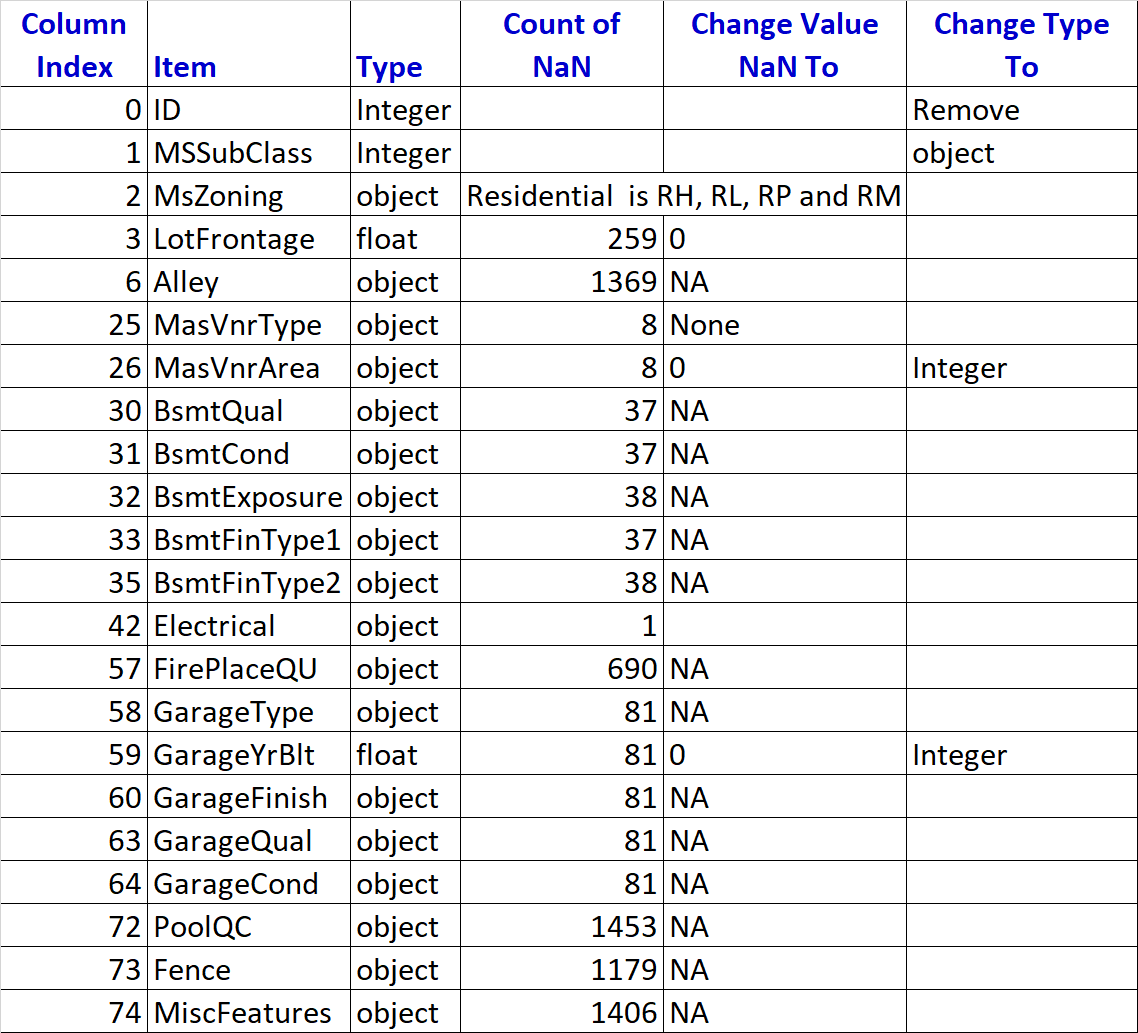

# EDA cleaning --------> Start

<div class="alert alert-block alert-info">
MSZoning <b>ONLY</b> include the residential properties <b>'RH', 'RL', 'RP' and 'RM'</b> this is decided from DataDictionary information on <b>MSZoning</b>
</div>

In [7]:
# Count counts of each type of unique values in MSZoning
df_house.MSZoning.value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [8]:
# include ONLY residential properties for column MSZoning
df_house = df_house[df_house.MSZoning.isin(['RL','RM','RP','RH'])]

In [9]:
# Count counts of each type of unique values in MSZoning, in this case 75 were removed
df_house.MSZoning.value_counts(dropna=False)

RL    1151
RM     218
RH      16
Name: MSZoning, dtype: int64

In [10]:
df_house.MSZoning.shape

(1385,)

<div class="alert alert-block alert-info">
<b>File Overview Unique, Nulls, Zeros of all columns in a file</b> 
</div>

In [11]:
myfunc.file_overview(df_house)

Number of ROWS--> 1385 Number of COLUMNS--> 81


Column    Null  Null%     Type  Unique    Zero  Zero%
72         PoolQC  1378.0   99.5   object     3.0     0.0    0.0
74    MiscFeature  1333.0   96.2   object     4.0     0.0    0.0
6           Alley  1320.0   95.3   object     2.0     0.0    0.0
73          Fence  1108.0   80.0   object     4.0     0.0    0.0
57    FireplaceQu   641.0   46.3   object     5.0     0.0    0.0
3     LotFrontage   251.0   18.1  float64   110.0     0.0    0.0
59    GarageYrBlt    79.0    5.7  float64    96.0     0.0    0.0
64     GarageCond    79.0    5.7   object     5.0     0.0    0.0
58     GarageType    79.0    5.7   object     6.0     0.0    0.0
60   GarageFinish    79.0    5.7   object     3.0     0.0    0.0
63     GarageQual    79.0    5.7   object     5.0     0.0    0.0
35   BsmtFinType2    38.0    2.7   object     6.0     0.0    0.0
32   BsmtExposure    38.0    2.7   object     4.0     0.0    0.0
30       BsmtQual    37.0    2.7   object     4.0     0.0    0.0
31       BsmtCond    37.0    2.7   object     4.0     0.0    0.0
33   BsmtFinType1    37.0    2.7   object     6.0     0.0    0.0
26     MasVnrArea     5.0    0.4  float64   320.0   813.0   58.7
25     MasVnrType     5.0    0.4   object     4.0     0.0    0.0
42     Electrical     1.0    0.1   object     5.0     0.0    0.0
0              Id     0.0    0.0    int64  1385.0     0.0    0.0
55     Functional     0.0    0.0   object     7.0     0.0    0.0
56     Fireplaces     0.0    0.0    int64     4.0   641.0   46.3
53    KitchenQual     0.0    0.0   object     4.0     0.0    0.0
52   KitchenAbvGr     0.0    0.0    int64     4.0     1.0    0.1
51   BedroomAbvGr     0.0    0.0    int64     8.0     6.0    0.4
50       HalfBath     0.0    0.0    int64     3.0   886.0   64.0
49       FullBath     0.0    0.0    int64     4.0     8.0    0.6
48   BsmtHalfBath     0.0    0.0    int64     3.0  1304.0   94.2
54   TotRmsAbvGrd     0.0    0.0    int64    12.0     0.0    0.0
61     GarageCars     0.0    0.0    int64     5.0    79.0    5.7
46      GrLivArea     0.0    0.0    int64   832.0     0.0    0.0
62     GarageArea     0.0    0.0    int64   433.0    79.0    5.7
65     PavedDrive     0.0    0.0   object     3.0     0.0    0.0
66     WoodDeckSF     0.0    0.0    int64   269.0   711.0   51.3
67    OpenPorchSF     0.0    0.0    int64   193.0   645.0   46.6
68  EnclosedPorch     0.0    0.0    int64   118.0  1183.0   85.4
69      3SsnPorch     0.0    0.0    int64    20.0  1361.0   98.3
70    ScreenPorch     0.0    0.0    int64    75.0  1271.0   91.8
71       PoolArea     0.0    0.0    int64     8.0  1378.0   99.5
75        MiscVal     0.0    0.0    int64    19.0  1335.0   96.4
76         MoSold     0.0    0.0    int64    12.0     0.0    0.0
77         YrSold     0.0    0.0    int64     5.0     0.0    0.0
78       SaleType     0.0    0.0   object     9.0     0.0    0.0
79  SaleCondition     0.0    0.0   object     6.0     0.0    0.0
47   BsmtFullBath     0.0    0.0    int64     4.0   803.0   58.0
40      HeatingQC     0.0    0.0   object     5.0     0.0    0.0
45   LowQualFinSF     0.0    0.0    int64    22.0  1363.0   98.4
11      LandSlope     0.0    0.0   object     3.0     0.0    0.0
17    OverallQual     0.0    0.0    int64    10.0     0.0    0.0
16     HouseStyle     0.0    0.0   object     8.0     0.0    0.0
15       BldgType     0.0    0.0   object     5.0     0.0    0.0
14     Condition2     0.0    0.0   object     8.0     0.0    0.0
13     Condition1     0.0    0.0   object     9.0     0.0    0.0
12   Neighborhood     0.0    0.0   object    25.0     0.0    0.0
10      LotConfig     0.0    0.0   object     5.0     0.0    0.0
19      YearBuilt     0.0    0.0    int64   112.0     0.0    0.0
9       Utilities     0.0    0.0   object     2.0     0.0    0.0
8     LandContour     0.0    0.0   object     4.0     0.0    0.0
7        LotShape     0.0    0.0   object     4.0     0.0    0.0
5          Street     0.0    0.0   object     2.0     0.0    0.0
4         LotArea     0.0    0.0    int64  103

<div class="alert alert-block alert-info">
<b>COMPARE</b> The columns that are related to each other, where the columns containing NaN's are the same when compared
</div>

In [12]:
# Compare and see if NaN values are related with associated Columns 
myfunc.compare_column_nan(df_house,'GarageCond'  ,('GarageQual','GarageType','GarageFinish','GarageYrBlt'))
myfunc.compare_column_nan(df_house,'BsmtExposure',('BsmtFinType2'))
myfunc.compare_column_nan(df_house,'BsmtQual'    ,('BsmtCond','BsmtFinType1'))
myfunc.compare_column_nan(df_house,'MasVnrType'  ,('MasVnrArea'))

GarageCond All NaNs are related with ('GarageQual', 'GarageType', 'GarageFinish', 'GarageYrBlt')
BsmtExposure All NaNs are related with BsmtFinType2
BsmtQual All NaNs are related with ('BsmtCond', 'BsmtFinType1')
MasVnrType All NaNs are related with MasVnrArea


<div class="alert alert-block alert-info">
<b>Might not need to delete these columns</b>
</div>

In [13]:
# # MSSubClass requires to be an object or string as it is not a calculating column
df_house.MSSubClass = df_house.MSSubClass.astype(str)                       # Change the type from Integer to String 

# # Using File Overview & Pandas Profiling Report, fields identified to be removed are 'Id','GarageCars','PoolQC','MiscFeature','Alley','Fence'
# df_house.drop(['Id','GarageCars','PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True) 
df_house.drop(['Alley'],axis=1,inplace=True) 
#df_house.drop(['Id','Alley','Utilities', 'LandSlope' ],axis=1,inplace=True) 

#noren_list.remove('Id')
#noren_list.remove('Alley')
#noren_list.remove('Utilities')
#noren_list.remove('Landslope')


<div class="alert alert-block alert-info">
<b>Clean up Columns</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Fill Object Columns that have NaN with NA
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Fill Numeric Columns that have NaN with 0
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Fill Object Columns that have NaN with None
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Fill Object Columns that have NaN with mode() value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Group and calculate Median() and replace value
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;Change float column to Integer
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7.&nbsp;&nbsp;&nbsp;Print number of nulls int the file
</div>

In [14]:
# Clean up Columns  - 
#                  1. Fill Object Columns that have NaN with NA
#                  2. Fill Numeric Columns that have NaN with 0
#                  3. Fill Object Columns that have NaN with None
#                  4. Fill Object Columns that have NaN with mode() value
#                  5. Group and calculate Median() and replace value
#                  6. Change float column to Integer
#                  7. Print number of nulls int the file

# When Columns have NaN replace with NA
column_list = ('PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 
               'GarageCond', 'GarageQual', 'GarageType', 'GarageFinish',
               'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2')

myfunc.column_fillna_to(df_house, column_list, 'NA')    

# When Columns have NaN replace with 0
column_list = ('LotFrontage', 'GarageYrBlt', 'MasVnrArea')

myfunc.column_fillna_to(df_house, column_list, 0)  

# When Columns have NaN replace with None, function requires more than 1 entry in the list so in this case we just repeat the column
column_list = ('MasVnrType', 'MasVnrType')

myfunc.column_fillna_to(df_house, column_list, 'None')  

#When Columns have NaN replace with Mode()
df_house.Electrical.fillna(df_house.Electrical.mode()[0],inplace=True)

# Group Neighborhood with LotFrontage, fill LotFrontage with calculated Median()
df_house['LotFrontage'] = df_house.groupby('Neighborhood')['LotFrontage'].transform(lambda a: a.fillna(a.median())) 

# Change float column to Integer
df_house.GarageYrBlt=df_house.GarageYrBlt.astype(int) 

print (df_house.isnull().sum().sum(),'null')

0 null


<div class="alert alert-block alert-info">
<b>Create Column Lists</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;CATEGORICAL Column List
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;RANKING Column List
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;RENOVATION Column List
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;PRODICTORS Column List not including the TARGET 'SalePrice'
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Print all the created lists
</div>

In [15]:
# Columns Identified wether they are Predictors, Categories or Features or Fixtures

# CATEGORICAL Column List
cat_list = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 
            'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
            'Electrical', 'GarageType', 'GarageYrBlt', 'MiscFeature', 'MoSold', 'YrSold','SaleType',
            'SaleCondition']

# RANKING Column List
ord_list = ['Alley', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',                  
         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
         'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

# RENOVATION Column List
ren_list = ['OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
            'ExterQual', 'ExterCond', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
            'Electrical', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
            'PavedDrive', 'PoolQC', 'Fence','LandSlope', 'Utilities', 'BsmtQual', 'BsmtExposure', 'Functional']

# PRODICTORS Column List not including the TARGET 'SalePrice'
num_list=[a for a in df_house.columns.values if(a not in cat_list) and (a not in ord_list) and (a not in 'SalePrice')]

noren_list = [a for a in df_house.columns.values if a not in ren_list] #Unfixable features
noren_list.remove('SalePrice') #Remove Target/Label Column name

print ('\nCategorical Column List Count:     ', len(cat_list), '\n', cat_list, '\n')
print ('\nOrdinal Column List Count:         ', len(ord_list), '\n', ord_list, '\n')
print ('\nNumerical Column List Count:       ', len(num_list), '\n', num_list, '\n')
print ('\n  TOTAL Column List Count:         ', len(cat_list)+len(ord_list)+len(num_list), '\n')
print ('\nRenovation Column List Count:      ', len(ren_list), '\n', ren_list, '\n')
print ('\nDon''t Renovate Column List Count: ', len(noren_list), '\n', noren_list, '\n')


Categorical Column List Count:      29 
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'] 


Ordinal Column List Count:          20 
 ['Alley', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'] 


Numerical Column List Count:        31 
 ['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 

<div class="alert alert-block alert-info">
<b>Add new columns to DataFrame and remove Columns that make up new column</b> 
</div>

In [16]:
# Calculate the Year Age that the house was when it was sold
df_house['YrAgeWhenSold'] = (df_house.YrSold + (df_house.MoSold-1)/12.) - df_house.YearBuilt

# Add new columns to DataFrame and remove Columns associated to new column 
df_house['Age_House']  = df_house['YrSold']      - df_house['YearBuilt']                        # Age of the property
df_house['Age_Garage'] = df_house['YrSold']      - df_house['GarageYrBlt']                      # Age of the gararge
df_house['BsmtFinSF']  = df_house['BsmtFinSF1']  + df_house['BsmtFinSF2']                       # Basement Finished Square Feet
df_house['TotalSF']    = df_house['TotalBsmtSF'] + df_house['1stFlrSF'] + df_house['2ndFlrSF']  # House Built Square Feet

# Remove columns from DataFrame that were used to build new column 
df_house.drop(columns=['YearBuilt','GarageYrBlt','BsmtFinSF1','BsmtFinSF2'], inplace=True)

# Add new columns to appropriate lists
num_list.extend(['Age_House', 'Age_Garage', 'BsmtFinSF', 'TotalSF'])                            # Add to num_list group
noren_list.extend(['Age_House', 'Age_Garage', 'BsmtFinSF', 'TotalSF'])                          # Add to group

# Remove BsmtFinSF1 & BsmtFinSF2 from num_list group
num_list.remove('BsmtFinSF1')
num_list.remove('BsmtFinSF2')

# Remove YearBuilt from Norenovations and Categorical Lists
noren_list.remove('YearBuilt')
cat_list.remove('YearBuilt')

# Remove GarageYrBlt from Norenovations and Categorical Lists
noren_list.remove('GarageYrBlt')
cat_list.remove('GarageYrBlt')

<div class="alert alert-block alert-info">
<b>CONVERT String Item Values to numeric representation</b> 
</div>

In [17]:
# CONVERT String Item Values to numeric representation, for required columns in Renovation Column List
for column in ren_list:
    if(df_house[column].dtype == 'object'):
        if column in ['BsmtFinType1', 'BsmtFinType2']:
            df_house[column] = df_house[column].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
        elif column in ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                   'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']:
            df_house[column] = df_house[column].map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
        elif column == 'Utilities':
            df_house[column] = df_house[column].map({'NA':0, 'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})
        elif column == 'LandSlope':
            df_house[column] = df_house[column].map({'NA':0, 'Sev':1, 'Mod':2, 'Gtl':3})
        elif column == 'BsmtExposure':
            df_house[column] = df_house[column].map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
        elif column == 'Functional':
            df_house[column] = df_house[column].map({'NA':0, 'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
        elif column == 'GarageFinish':
            df_house[column] = df_house[column].map({'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
        elif column == 'PavedDrive':
            df_house[column] = df_house[column].map({'N':1, 'P':2, 'Y':3})
        elif column == 'Fence':
            df_house[column] = df_house[column].map({'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4})
        else: print (column, 'untouched')

#df.LotShape=df.LotShape.map({'NA':0,'IR3':1,'IR2':2,'IR1':3,'Reg':4})

RoofStyle untouched
RoofMatl untouched
Exterior1st untouched
Exterior2nd untouched
MasVnrType untouched
Heating untouched
CentralAir untouched
Electrical untouched


<div class="alert alert-block alert-info">
<b>House Sale Prices</b> 
<br>The data was collected betwen 2006 and 2010. 
<br>1. There is roughly an even number of houses sold between 2006 and 2009. 
<br>2. Use houses sold in 2010 as the test set
<br>3. Plot SalesPrice Skewness and distribution
<br>4. Plot linear regression of SalesPrice 
<br>5. Plot SalesPrice, Log SalePrice and Age of property 
</div>

The data was collected betwen 2006 and 2010. Let's look at the number of houses sold each year.

In [18]:
# Find the number of houses sold each year
df_house.YrSold.value_counts()

2009    321
2007    313
2006    299
2008    288
2010    164
Name: YrSold, dtype: int64


skew 1.9613364198866114  |  kurt 6.793399800836269 

 count      1385.000000
mean     180136.283032
std       79906.363281
min       37900.000000
25%      129000.000000
50%      160000.000000
75%      212900.000000
max      755000.000000
Name: SalePrice, dtype: float64


((array([-3.29033432, -3.03205334, -2.88835498, ...,  2.88835498,
          3.03205334,  3.29033432]),
  array([ 37900,  39300,  52000, ..., 625000, 745000, 755000], dtype=int64)),
 (74089.82633492883, 180136.28303249102, 0.9256069211497941))

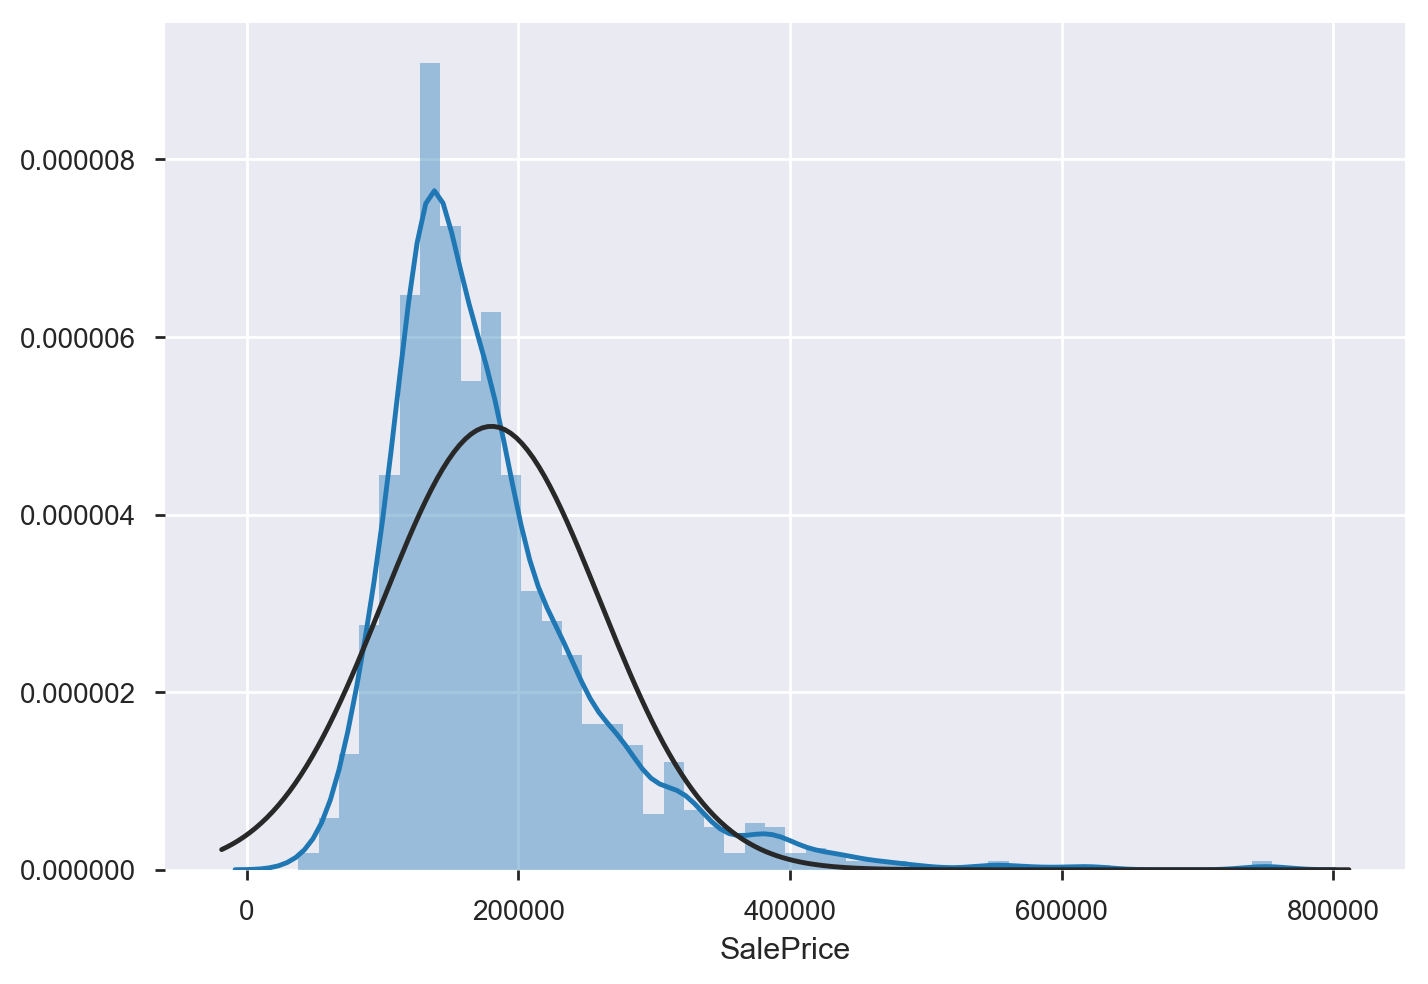

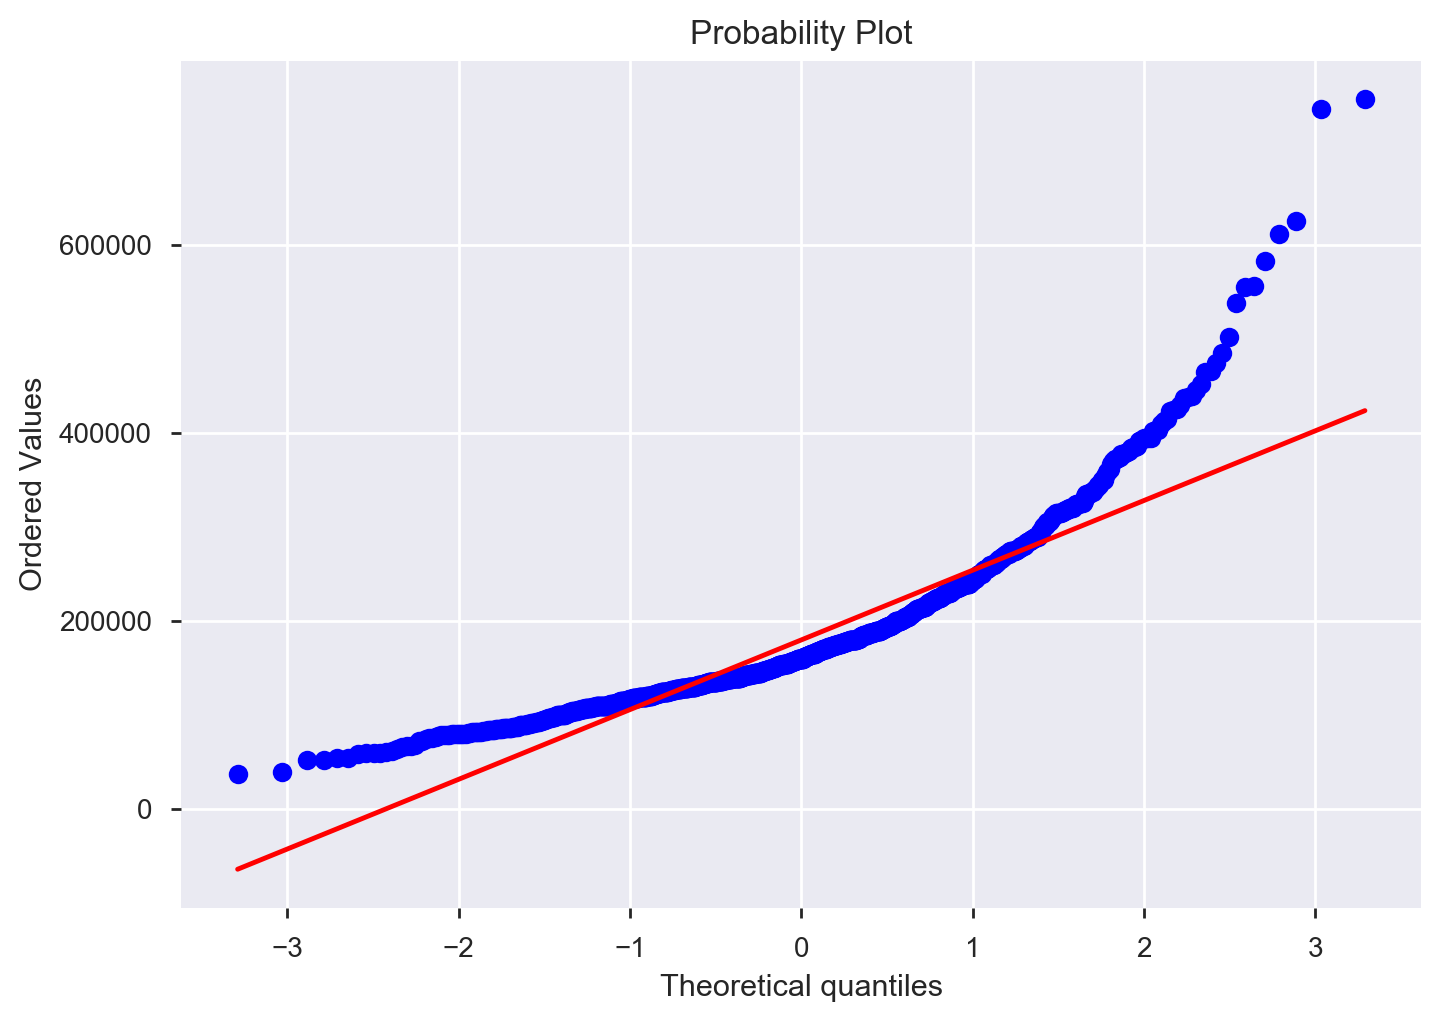

In [19]:
# INVESTIGATE SalePrice, Log Price and Age of property when sold
print ('\nskew', df_house.SalePrice.skew(),' | ','kurt', df_house.SalePrice.kurt(), '\n\n', df_house.SalePrice.describe())
sns.distplot(df_house.SalePrice, fit = stats.norm)
fig = plt.figure()
stats.probplot(df_house.SalePrice, plot = plt)

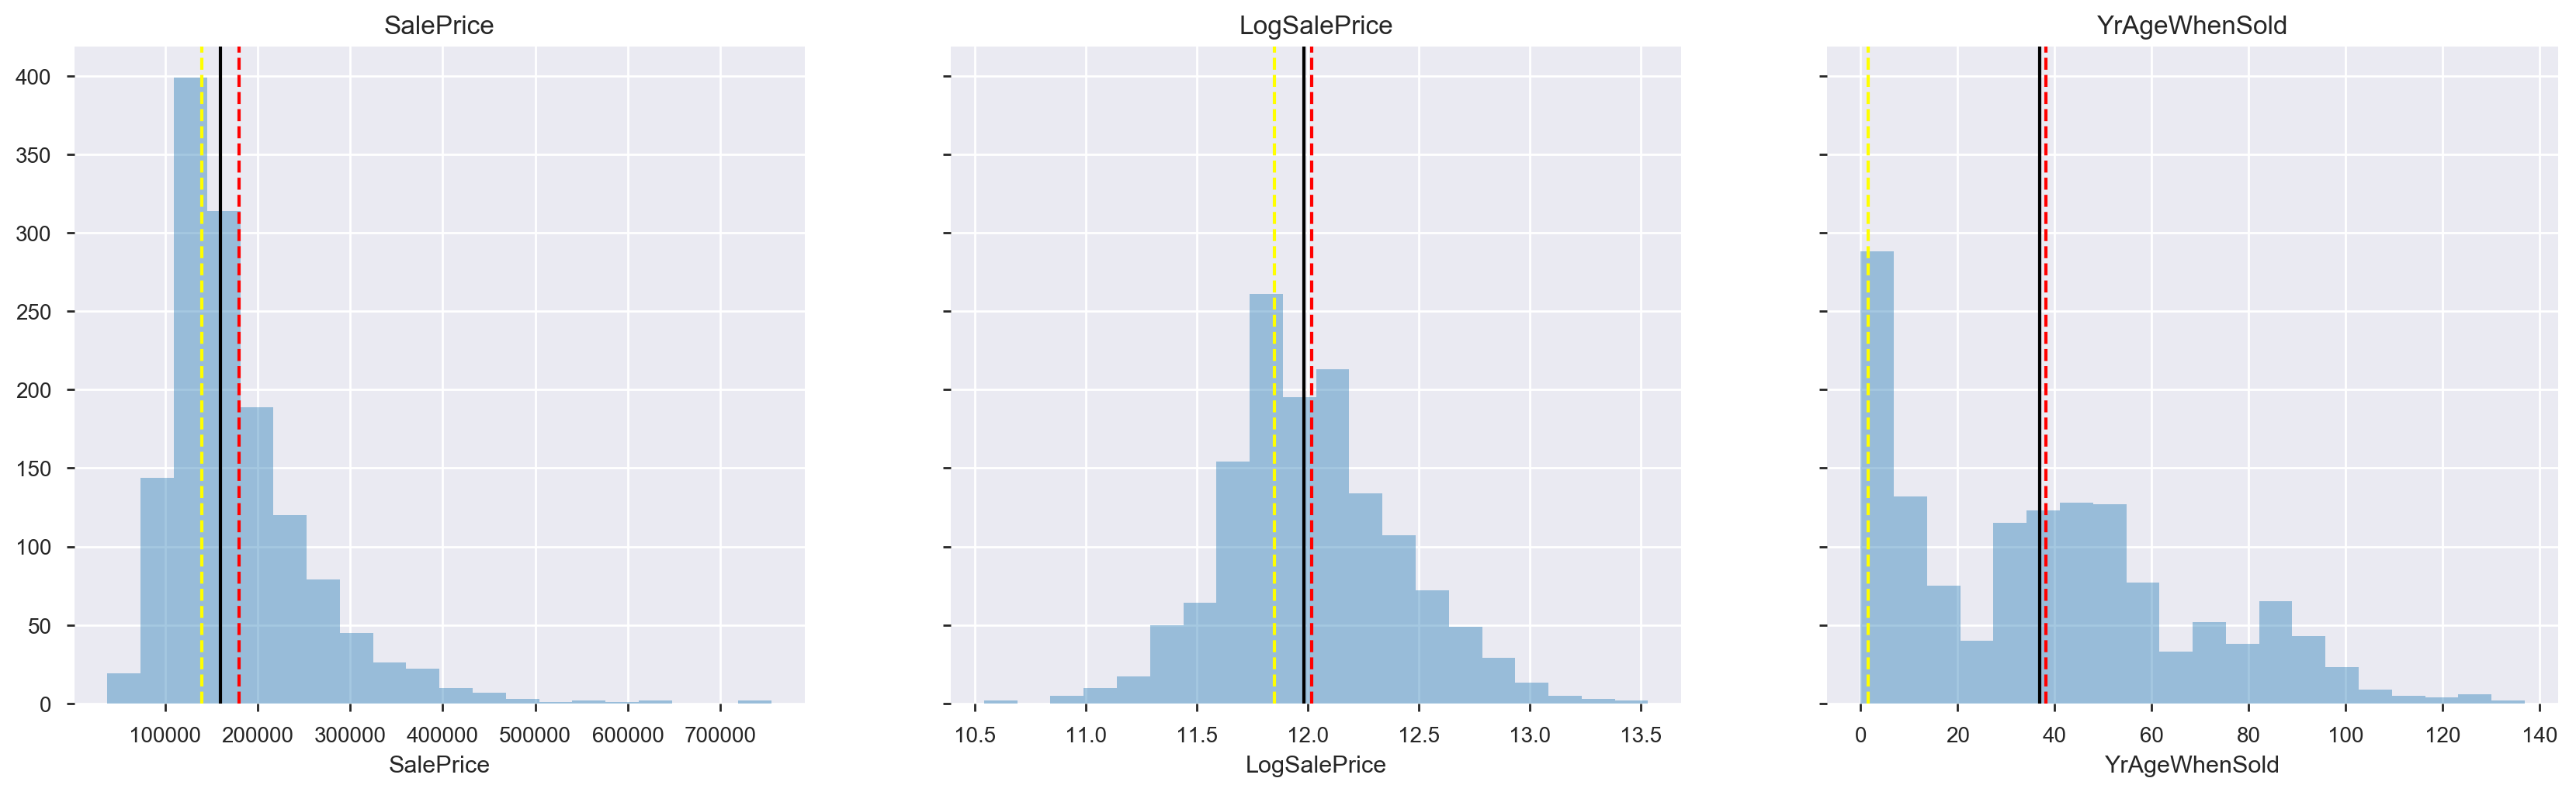

In [20]:
# Create a new feature of the natural log of the sale price
df_house['LogSalePrice'] = np.log(df_house.SalePrice + 1)

name = ['SalePrice', 'LogSalePrice', 'YrAgeWhenSold']
fig, ax = plt.subplots(1, 3, sharex = 'col',sharey = 'row')
plt.subplots_adjust(left = 1,right = 3)
    
for num in range(len(name)):
    ax[num].set_title(name[num], y = 1)
    ax[num].axvline(np.median(df_house[name[num]]),     color = 'black',  linestyle = '-', lw = 1.5)    # Median  
    ax[num].axvline(np.mean(df_house[name[num]]),       color = 'red',    linestyle = '--', lw = 1.5)    # Mean  
    ax[num].axvline(stats.mode(df_house[name[num]])[0], color = 'yellow', linestyle = '--', lw = 1.5)    # Mode  
    sns.distplot(df_house[name[num]], bins = 20, kde = False, ax = ax[num])

<div class="alert alert-block alert-info">
<b>Normalize</b> Check & Transform Numerical Features Distribution
</div>

In [21]:
# Check & Transform Numerical Features Distribution
myfunc.normalize_data(df_house, num_list)            # Normalize numeric Features

SKEWNESS TRANSFORM
LotArea 	 12.06 	==> 0.07 	 Log 	 
MasVnrArea 	 2.42 	==> 0.48 	 Log +1 	 
BsmtUnfSF 	 0.94 	==> 0.24 	 Square Root 	 
TotalBsmtSF 	 1.52 	==> 1.3 	 Square Root 	 	skewed
1stFlrSF 	 1.4 	==> 0.1 	 Log 	 
2ndFlrSF 	 0.88 	==> 0.35 	 Log +1 	 
LowQualFinSF 	 9.09 	==> 7.86 	 Log +1 	 	skewed
GrLivArea 	 1.38 	==> 0.02 	 Log 	 
BsmtFullBath 	 0.58 	==> 0.34 	 Cube Root 	 
BsmtHalfBath 	 4.01 	==> 3.78 	 Cube Root 	 	skewed
KitchenAbvGr 	 4.39 	==> 0.28 	 Cube Root 	 
TotRmsAbvGrd 	 0.69 	==> 0.06 	 Log +1 	 
Fireplaces 	 0.63 	==> 0.01 	 Square Root 	 
WoodDeckSF 	 1.52 	==> 0.12 	 Log +1 	 
OpenPorchSF 	 2.39 	==> 0.04 	 Log +1 	 
EnclosedPorch 	 3.05 	==> 2.07 	 Log +1 	 	skewed
3SsnPorch 	 10.03 	==> 7.52 	 Log +1 	 	skewed
ScreenPorch 	 4.04 	==> 3.08 	 Log +1 	 	skewed
PoolArea 	 14.44 	==> 13.98 	 Log +1 	 	skewed
PoolQC 	 15.54 	==> 14.24 	 Cube Root 	 	skewed
MiscVal 	 23.87 	==> 5.12 	 Log +1 	 	skewed
Age_House 	 0.57 	==> 0.24 	 Square Root 	 
Age_Garage 	 3.

<div class="alert alert-block alert-info">
<b>Saleprice against all columns in DataFrame Heatmap</b> 
</div>

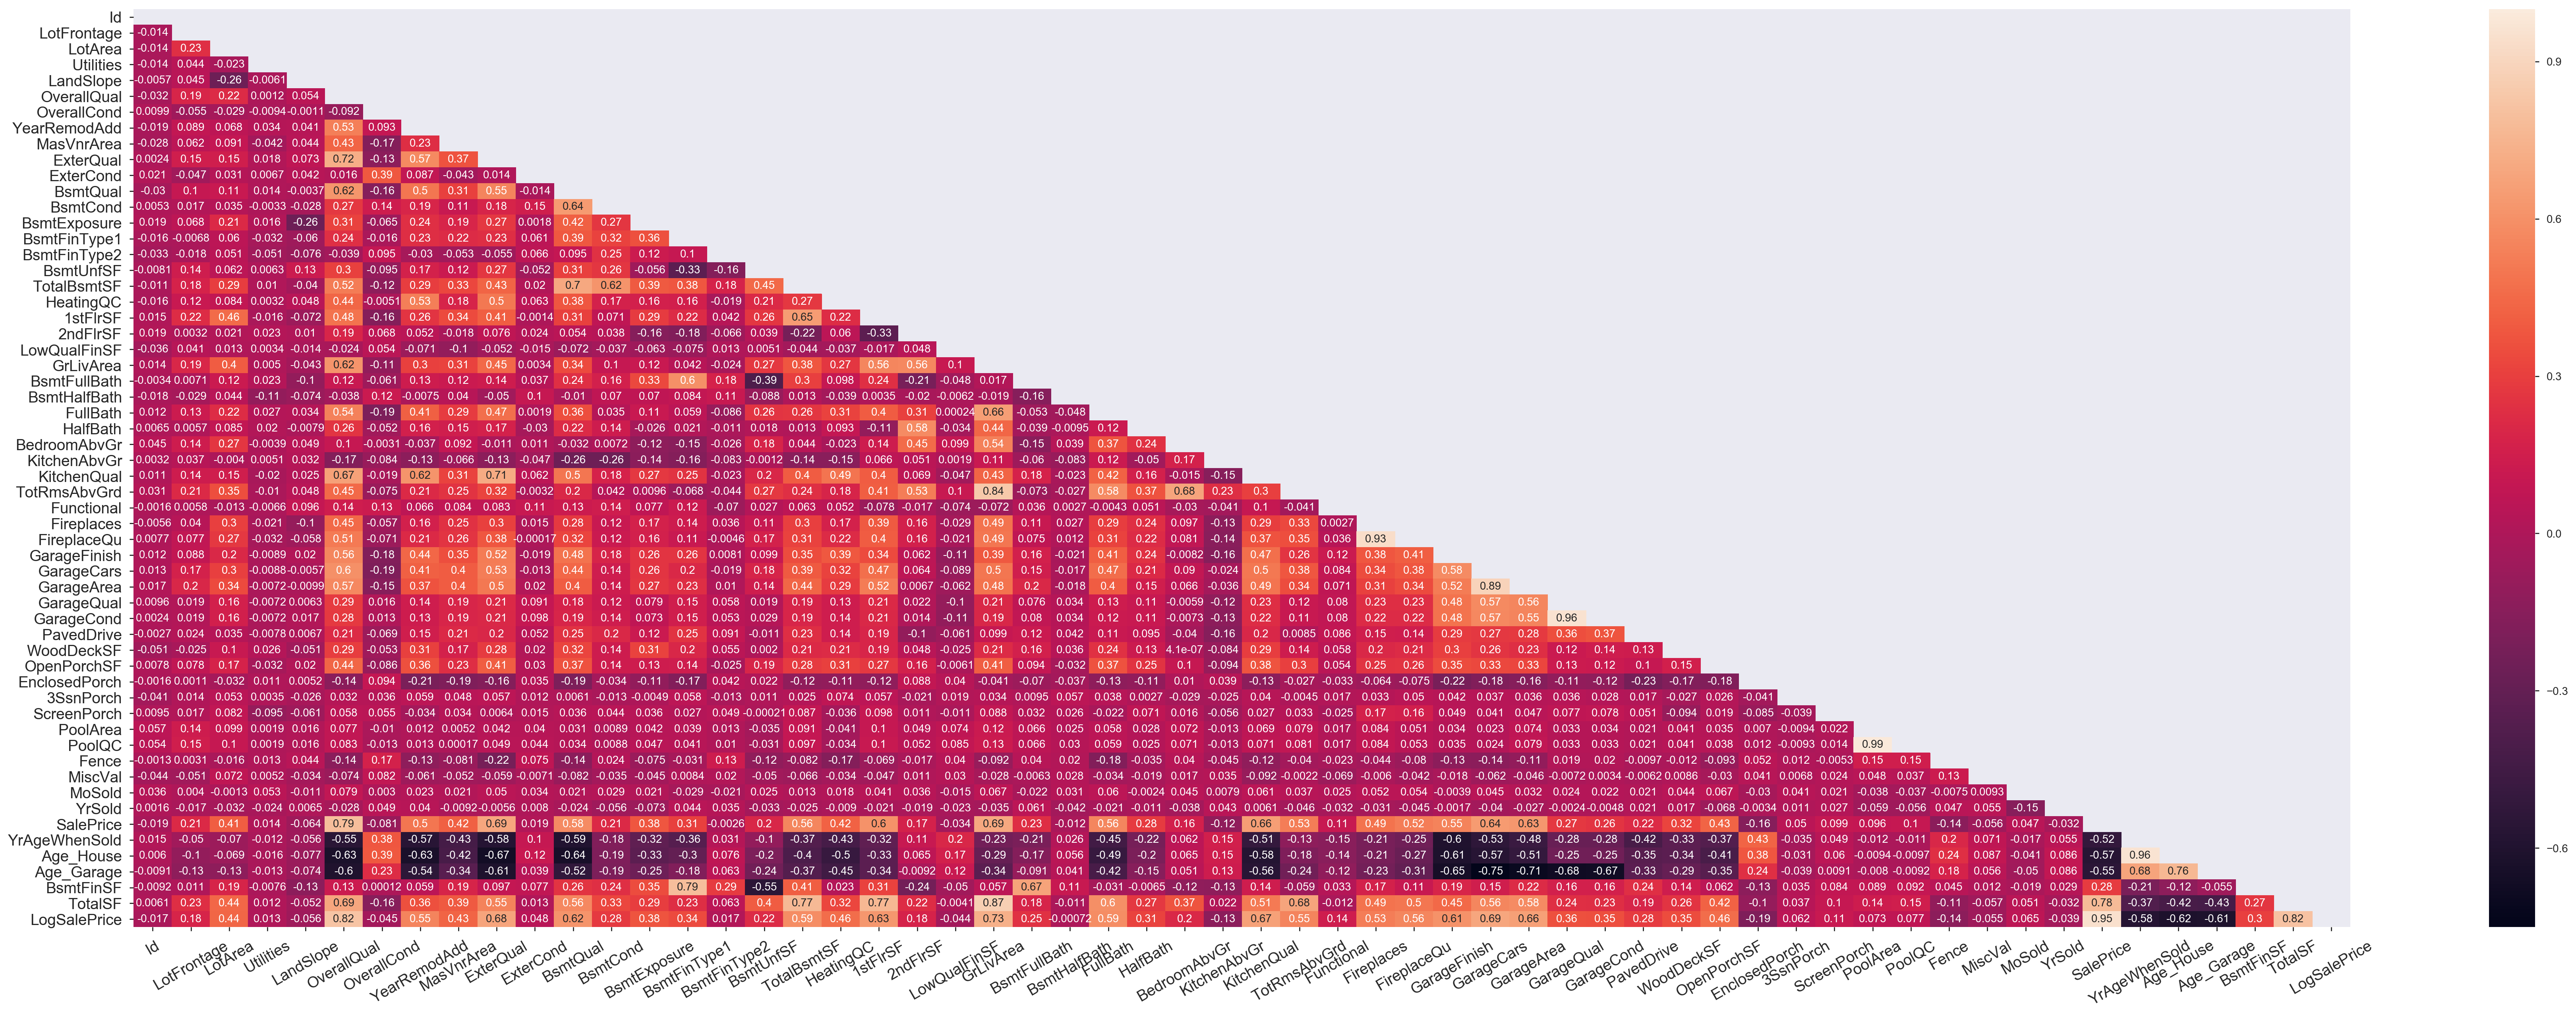

In [22]:
y = df_house.SalePrice                            
df_with_target = df_house.copy()
df_with_target['SalePrice'] = y
myfunc.corr_heat_map(df_with_target)

<div class="alert alert-block alert-info">
<b>Correllation Heatmap with top 15 Highest Correllation</b> 
</div>

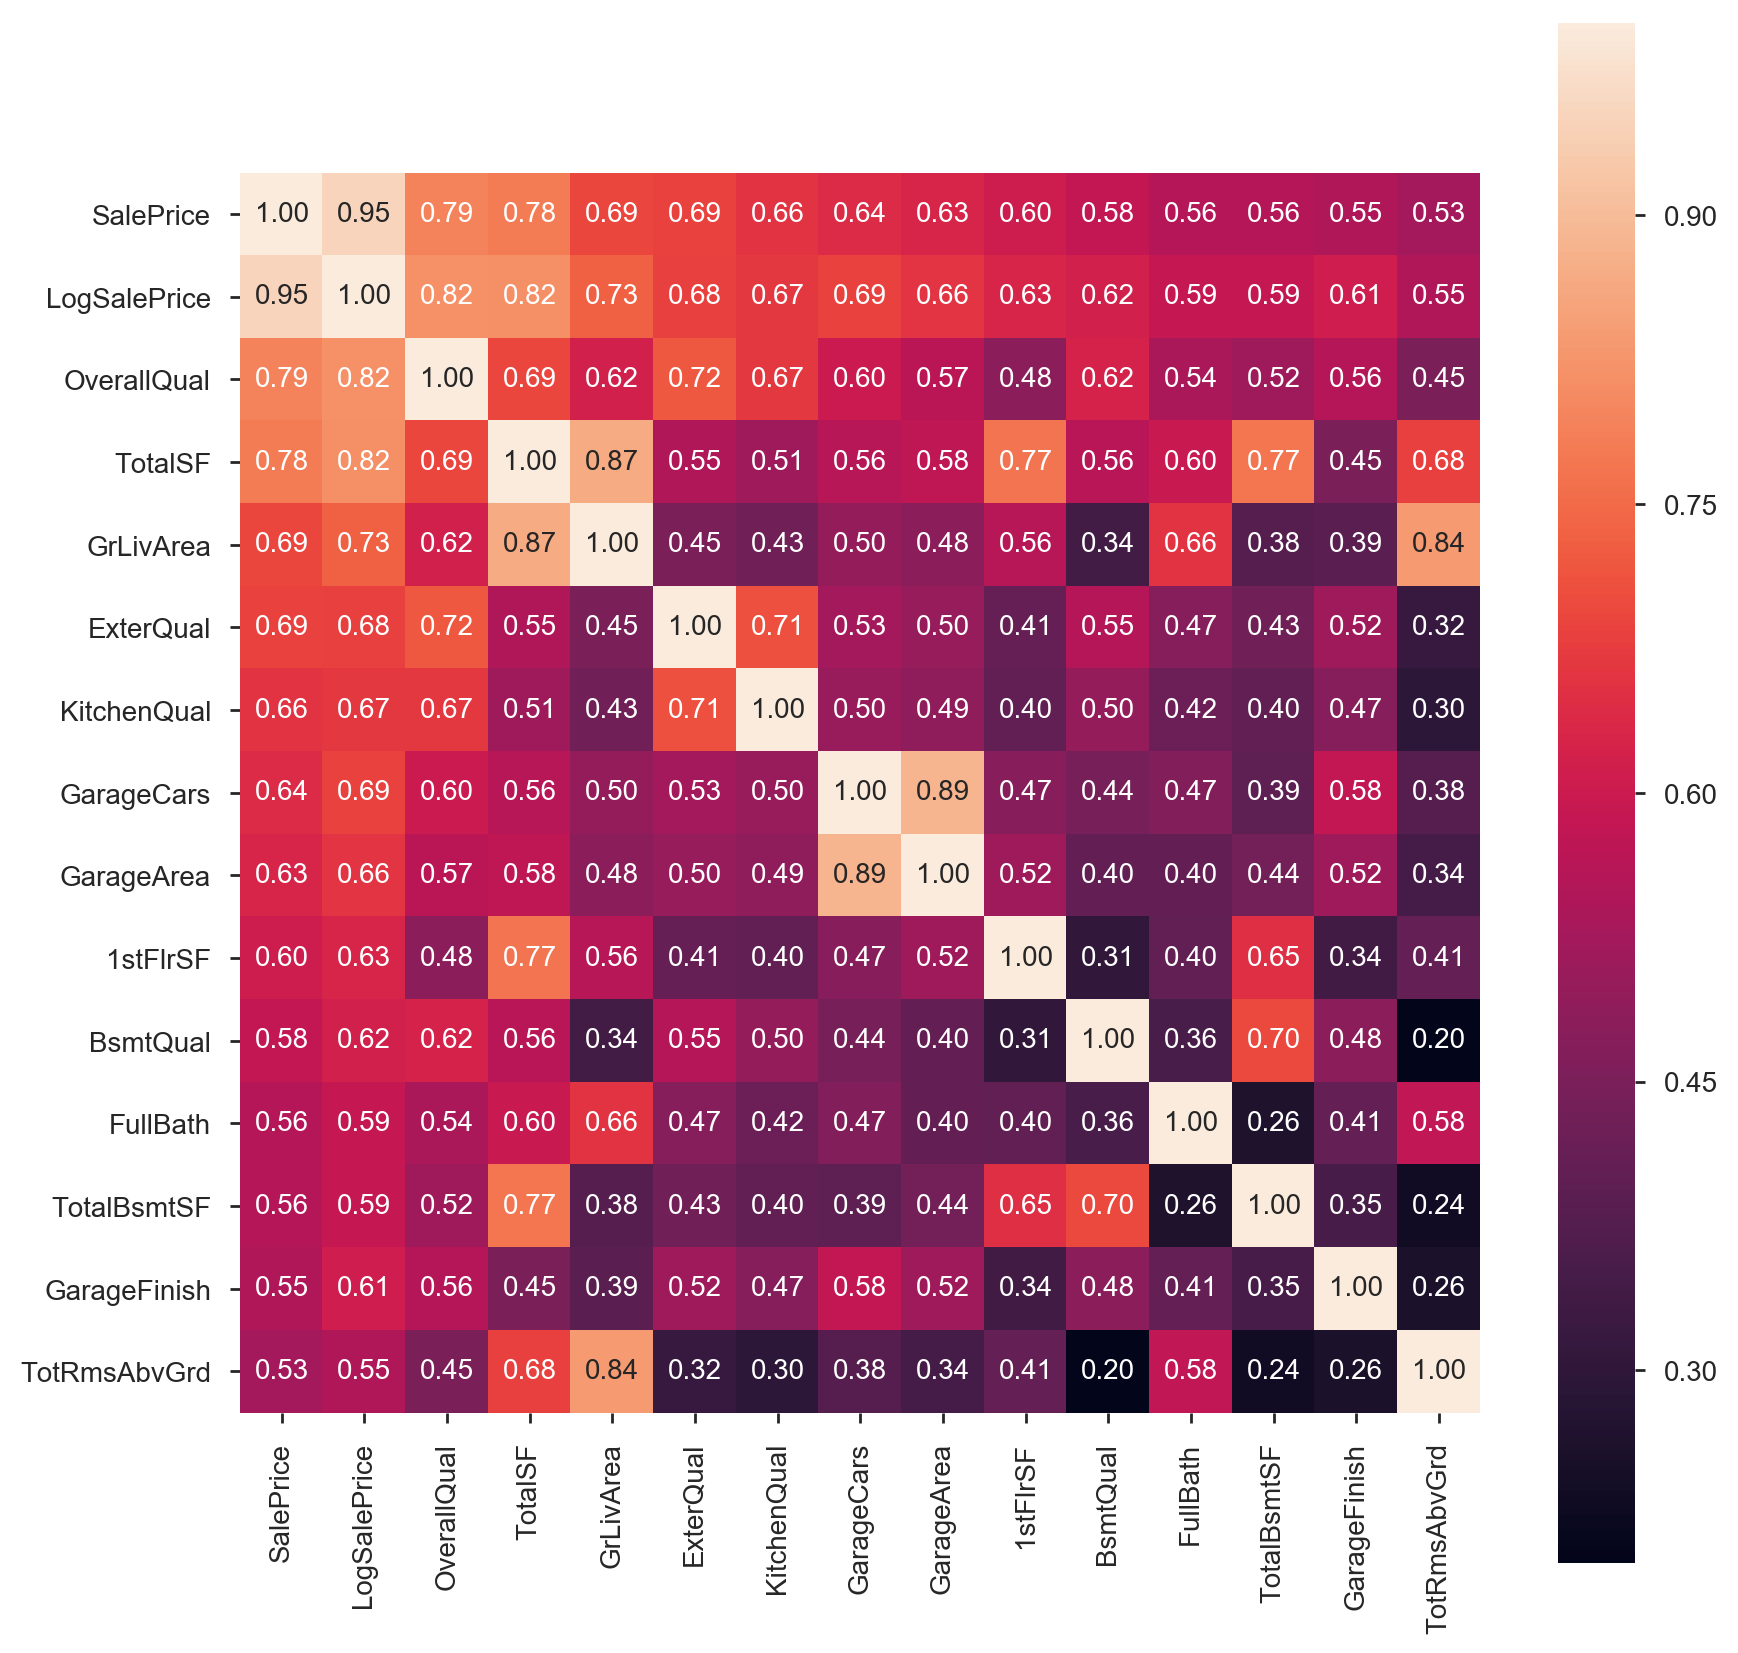

In [23]:
#Top 15 Features Correlated to SalesPrice
fig,ax = plt.subplots(figsize = (10, 10))
cols   = df_house.corr().nlargest(15, 'SalePrice')['SalePrice'].index
corr   = np.corrcoef(df_house[cols].values.T)
sns.heatmap(corr, cbar = True, annot = True, square = True, fmt = '.2f', yticklabels = cols.values, xticklabels = cols.values, ax = ax)
plt.show()

<div class="alert alert-block alert-info">
<b>Create DUMMYS from Categorical List</b> 
</div>

In [24]:
#CREATE REFERENCE COPY
df_copy=df_house.copy(deep=True)

# Create DUMMYS from Categorical List
if ('YrSold' in cat_list): cat_list.remove('YrSold')                        # Remove "YrSold" as we have Age of the property
    
# Create Dummies Columns list   
to_drop = [n + '_' + str(df_house[n].unique()[-1]) for n in cat_list]       # Get to_drop col names by using Categorical List

df_house = pd.get_dummies(df_house, columns = cat_list, drop_first = False) # Create dummy cols into the DataFrame

for a in to_drop:                                                           # Double Check to_drop Columns
    if(a not in df_house.columns.values):
        print (n)

df_house.drop(columns = to_drop, inplace = True)                            # Drop last dummy column

# EDA cleaning --------> End


# Seperate DataFrame Data into Test & Train Data

<div class="alert alert-block alert-info">
<b>Seperate TRAIN / TEST data</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Train Data to be <b>less than</b> 2010 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Test Data to be <b>equal</b> to 2010 
</div>

In [25]:
# Create TRAIN / TEST data

Target = 2010
X_train = df_house[(df_house.YrSold < Target)]
y_train = X_train.SalePrice


X_test = df_house[(df_house.YrSold == Target)]

y_test = X_test.SalePrice.values

print('Train shape:\t', X_train.shape, '\tTest shape:\t', X_test.shape, '\n')
print ('X_train.shape-->', X_train.shape, '\ty_train.shape-->', y_train.shape,
       '\nX_test.shape-->', X_test.shape, '\ty_test.shape-->', y_test.shape, '\n')
print ('Target is SalePrice\n')
print('='*10, 'Test Data', '='*10)
print ('Year    Count\n', Target, '\t', X_train.shape[1], '\n')
print('='*10, 'Train Data', '='*10)
print ('Year    Count\n', X_train.YrSold.value_counts())

X_test.drop(['SalePrice', 'YrSold'], axis = 1, inplace = True)  
X_train.drop(['SalePrice', 'YrSold'], axis = 1, inplace = True) 

Train shape:	 (1221, 286) 	Test shape:	 (164, 286) 

X_train.shape--> (1221, 286) 	y_train.shape--> (1221,) 
X_test.shape--> (164, 286) 	y_test.shape--> (164,) 

Target is SalePrice

========== Test Data ==========
Year    Count
 2010 	 286 

========== Train Data ==========
Year    Count
 2009    321
2007    313
2006    299
2008    288
Name: YrSold, dtype: int64


<div class="alert alert-block alert-warning">
<b>Test All DIFFERENT Columns to see where it is falling over or shorten your data - UNCOMMENT to test</b> 
</div>

In [26]:
# # Test to see all Unique counts on strings and make sure they are converted to numerics
# myfunc.field_count(df_house, 'obj')                                    # Valid 'int', 'flo', 'obj' and 'all' 

# # shows columns with at least 1 missing value or nulls
# null_counts = df_house.isnull().sum()
# null_counts[null_counts > 0]

# # Select what columns and rows you want to test
# start_column = 1
# column_count = 10
# row_count = 1021
# new_count = row_count - 1

# hold_Xtrain = X_train[start_column:column_count]

# Xtrain_Columns = hold_Xtrain.columns[start_column:column_count]

# print (Xtrain_Columns)

# Xtrain = X_train.loc[:new_count, X_train.columns.isin(list(Xtrain_Columns))]

# ytrain = y_train[:row_count]

# print (Xtrain.shape, ytrain.shape)

# print (Xtrain.head())

# from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, train_size=0.5, random_state=8)

# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()

# lr.fit(X_train, y_train)

# lr.score(X_test, y_test)


<div class="alert alert-block alert-info">
<b>Score and Plot output the R squared</b>
</div>

In [27]:
# Score and plot.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.5, random_state=8)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)
print('train R^2 :', lr.score(X_train, y_train))
print('-' * 30)
print('test  R^2 :', lr.score(X_test, y_test))

train R^2 : 0.984651407749259
------------------------------
test  R^2 : 0.8085687723684176


<div class="alert alert-block alert-info">
<b>Create PREDICTION by Cross Validating</b>
</div>

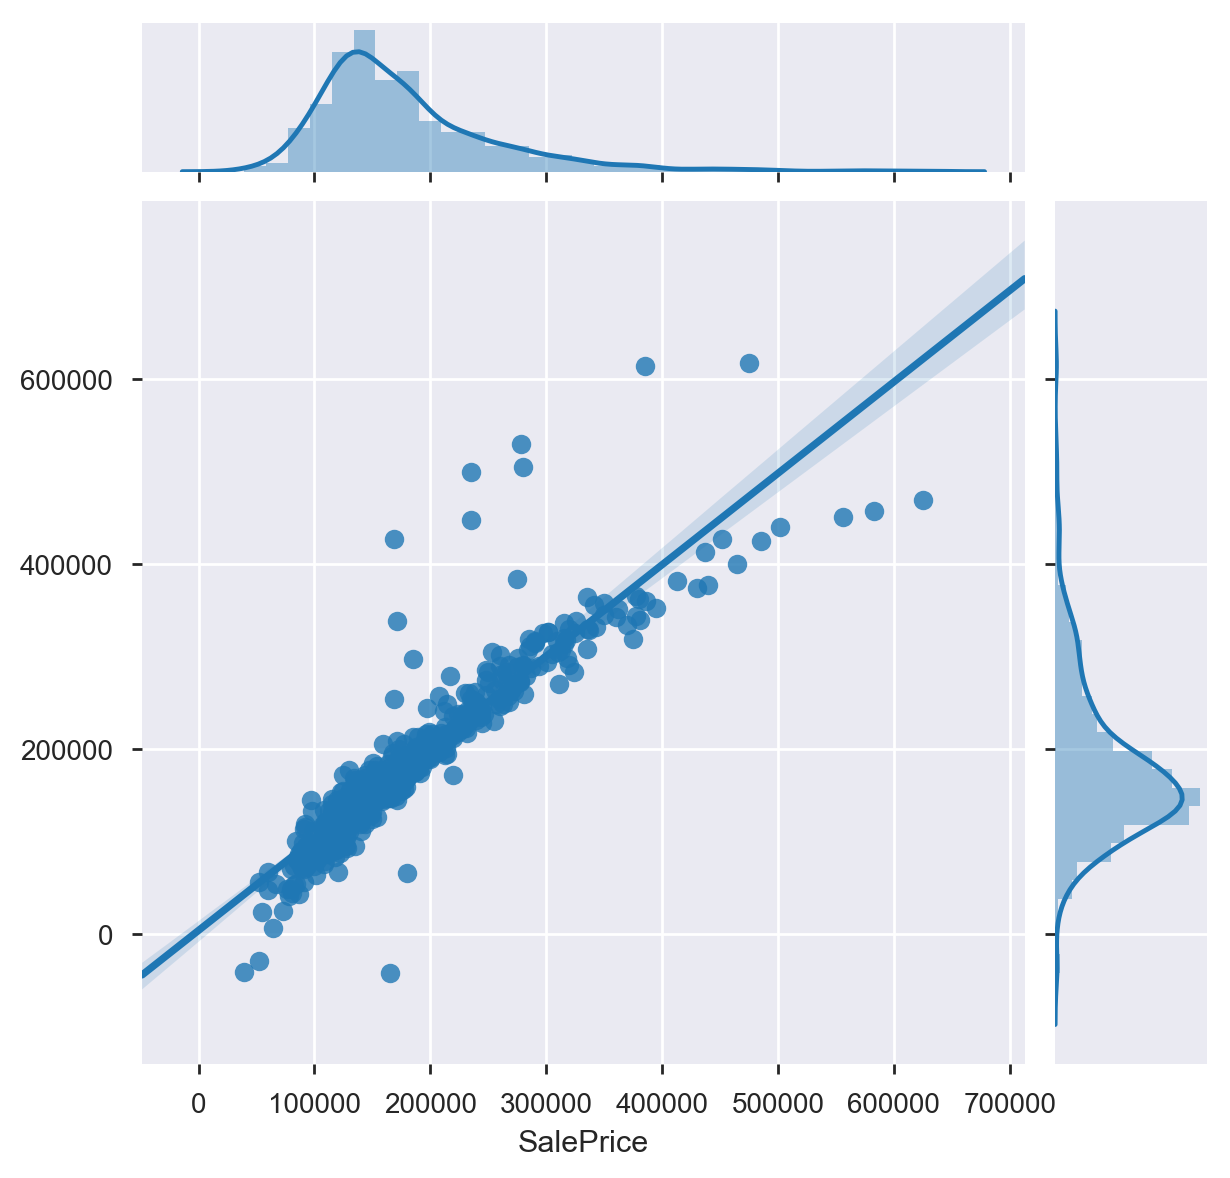

In [28]:
yhat = lr.predict(X_test)
ax = sns.jointplot(y_test, yhat, kind='reg', height=6)

In [29]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
scores = cross_val_score(lr, X_train, y_train, cv=5)
print("Cross-validated scores     :\t", scores)
print("Mean Cross-validated Score :\t", scores.mean())

Cross-validated scores     :	 [0.87122074 0.92148791 0.82825575 0.65690227 0.84432956]
Mean Cross-validated Score :	 0.8244392461348198


In [30]:
# iterate through folds 5-10
for folds in range(5, 10):
    print('------------------------------------\n', 'K:', folds)
    model = LinearRegression()
    
# Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))
    
# Make cross-validated predictions
    predictions = cross_val_predict(model, X_train, y_train, cv=folds)
    
    r2 = metrics.r2_score(y_train, predictions)
    print("Cross-Predicted R2:", r2)


------------------------------------
 K: 5
Cross-validated scores: [0.87122074 0.92148791 0.82825575 0.65690227 0.84432956]
Mean CV R2: 0.8244392461348198
Std CV R2: 0.08953857060832095
Cross-Predicted R2: 0.8373582479385852
------------------------------------
 K: 6
Cross-validated scores: [0.84223896 0.92937392 0.90520903 0.5715702  0.82864893 0.69990017]
Mean CV R2: 0.7961568676899722
Std CV R2: 0.12417928903038608
Cross-Predicted R2: 0.8049809798300978
------------------------------------
 K: 7
Cross-validated scores: [0.91511237 0.91906953 0.92979612 0.78409593 0.6188131  0.81925835
 0.68053483]
Mean CV R2: 0.8095257478773574
Std CV R2: 0.11424579256927227
Cross-Predicted R2: 0.8129287754518046
------------------------------------
 K: 8
Cross-validated scores: [0.91637545 0.91240546 0.91477329 0.89767433 0.45399802 0.90670704
 0.81717078 0.66484678]
Mean CV R2: 0.8104938948489847
Std CV R2: 0.15719233224563842
Cross-Predicted R2: 0.8165390689857916
--------------------------------

<div class="alert alert-block alert-info">
<b>OLS Regression</b> 
</div>

In [31]:
import statsmodels.api as sm
Y = y_train
X = X_train
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     82.72
Date:                Wed, 13 Mar 2019   Prob (F-statistic):          8.64e-224
Time:                        11:09:14   Log-Likelihood:                -6480.6
No. Observations:                 610   AIC:                         1.350e+04
Df Residuals:                     343   BIC:                         1.467e+04
Df Model:                         266                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Id                       -0.0577      1.712     -0.034      0.973      -3.426       3.310
LotFrontage             -35.9799     25.598     -1.406      0.161     -86.329      14.369
LotArea               -2582.0127   3094.159     -0.834      0.405   -8667.927    3503.901
Utilities             -4.188e+05   3.47e+04    -12.075      0.000   -4.87e+05   -3.51e+05
LandSlope              -730.1343   3784.721     -0.193      0.847   -8174.318    6714.049
OverallQual             590.5137   1124.355      0.525      0.600   -1620.985    2802.012
OverallCond           -1266.3564   1053.253     -1.202      0.230   -3338.004     805.292
MasVnrArea             -749.9511   1233.082     -0.608      0.543   -3175.306    1675.404
ExterQual              2115.5626   2300.611      0.920      0.358   -2409.519    6640.644
ExterCond             -1358.4401   2413.511     -0.563      0.574   -6105.586    3388.705
BsmtQual               4984.4784   1862.340      2.676      0.008    1321.435    8647.522
BsmtCond              -3288.9268   2501.161     -1.315      0.189   -8208.471    1630.618
BsmtExposure           3292.4385    924.549      3.561      0.000    1473.939    5110.938
BsmtFinType1             17.8524    702.187      0.025      0.980   -1363.282    1398.986
BsmtFinType2            846.6898   1054.826      0.803      0.423   -1228.052    2921.432
BsmtUnfSF                83.8542    224.919      0.373      0.710    -358.540     526.248
TotalBsmtSF           -3965.4437    920.611     -4.307      0.000   -5776.197   -2154.691
HeatingQC              -852.5116   1083.199     -0.787      0.432   -2983.060    1278.037
1stFlrSF               1099.4167   1.31e+04      0.084      0.933   -2.47e+04    2.69e+04
2ndFlrSF                297.7792   1513.526      0.197      0.844   -2679.181    3274.739
LowQualFinSF           3395.5512   2024.475      1.677      0.094    -586.396    7377.499
GrLivArea             -1.163e+05   2.67e+04     -4.358      0.000   -1.69e+05   -6.38e+04
BsmtFullBath          -2464.8306   2210.888     -1.115      0.266   -6813.435    1883.774
BsmtHalfBath          -4694.8455   3094.590     -1.517      0.130   -1.08e+04    1391.917
FullBath              -2474.5643   2572.629     -0.962      0.337   -7534.680    2585.551
HalfBath               3439.3559   2543.201      1.352      0.177   -1562.877    8441.589
BedroomAbvGr          -4364.4217   1607.492     -2.715      0.007   -7526.205   -1202.638
KitchenAbvGr          -3.601e+04   2.09e+04     -1.721      0.086   -7.72e+04    5138.045
KitchenQual            2526.3479   1687.117      1.497      0.135    -792.049    5844.745
TotRmsAbvGrd           2.225e+04   8097.163      2.748      0.006    6325.203    3.82e+04
Functional             1805.9547   1211.235      1.491      0.137    -576.429    4188.339
Fireplaces             

In [32]:
print ('R-squared for model:\t', results.rsquared)
print ('   The intercept is:\t', results.params[0])
print ('P-value for X_train:\t')
#print ('P-value for your X_train:\t', results.t_test([0, 1]).pvalue)

R-squared for model:	 0.984651407749259
   The intercept is:	 -0.05772463589312338
P-value for X_train:	


<div class="alert alert-block alert-info">
<b>COEFFICIENTS</b>
</div>

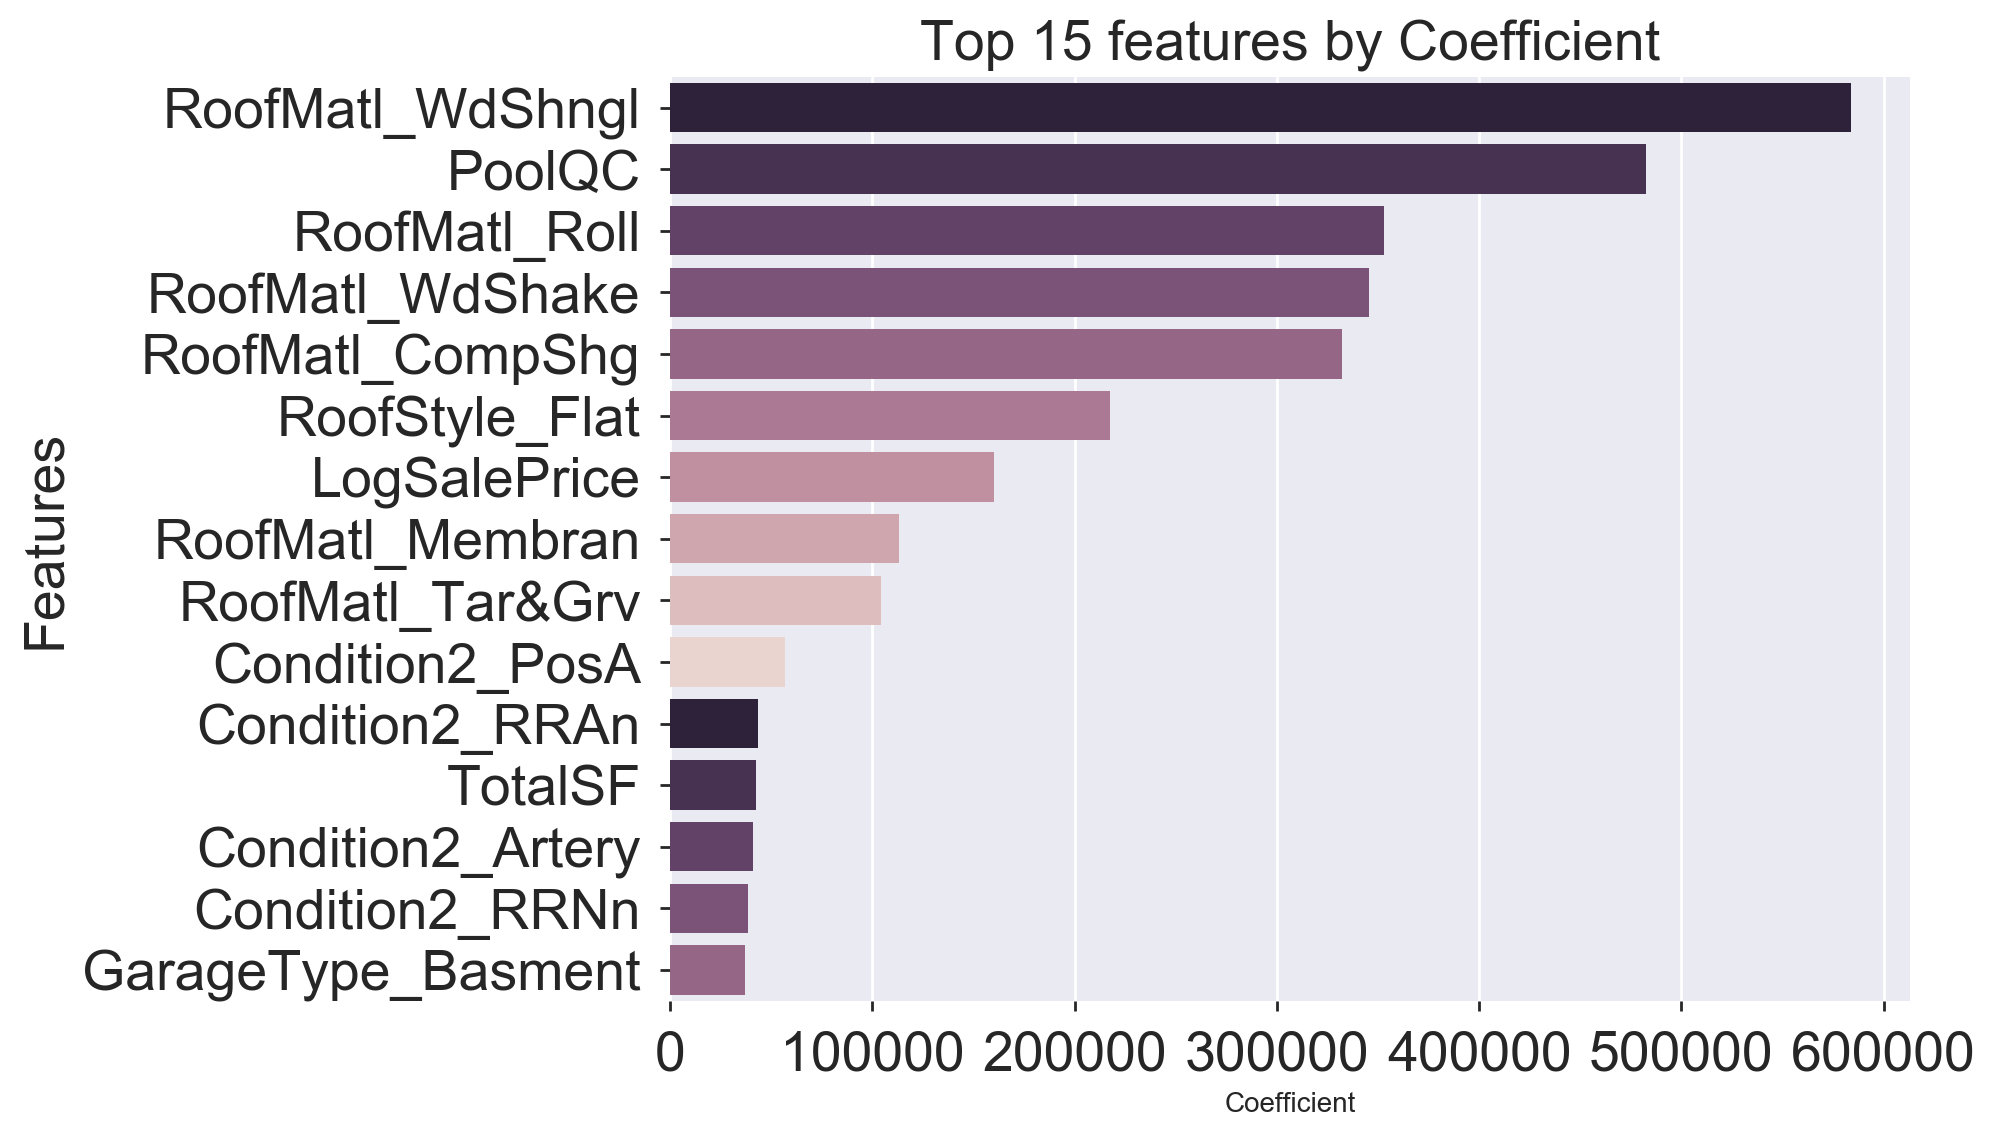

In [33]:
coefficients = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

coefficients.columns = ['Feature','Coefficient']

coef_sorted = coefficients.sort_values('Coefficient', ascending=False)

color = sns.cubehelix_palette(10, reverse=True)
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Coefficient", y="Feature", data = coef_sorted[0:15], palette = color)
ax.set_title('Top 15 features by Coefficient', fontsize = 20)
ax.set_xlabel('Coefficient', fontsize = 10)
ax.set_ylabel('Features', fontsize = 20)
ax.tick_params(labelsize = 20)
plt.show()

<div class="alert alert-block alert-info">
<b>Calculate the RESIDUALS</b> 
</div>

In [34]:
# Calculate the Residuals for Train & Test
train_residual = y_train.values - lr.predict(X_train)
test_residual  = y_test.values  - lr.predict(X_test)
print ('Train Residual-->', train_residual.shape[0], '\nTest Residual--->', test_residual.shape[0])

Train Residual--> 610 
Test Residual---> 611


<div class="alert alert-block alert-info">
<b>STANDARDIZE Features</b> 
</div>

In [35]:
# STANDARDIZE Features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train[num_list] = scale.fit_transform(X_train[num_list])
X_test[num_list]  = scale.transform(X_test[num_list])

print ('Train:\t', X_train.isnull().sum().sum(), 'nulls\nTest:\t', X_test.isnull().sum().sum(), 'nulls')
print ('Train:', X_train.shape, '  Test:', X_test.shape)

Train:	 0 nulls
Test:	 0 nulls
Train: (610, 284)   Test: (611, 284)


<div class="alert alert-block alert-info">
<b>Use LassoCV</b> - Cross Validation
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Define the model
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Fit the model 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Score the model 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Identify the mean MSE, standard deviations and alpha values 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Create values for identify bands for the standard deviation
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;Plot the mean MSE vs alpha values
</div>

In [36]:
# Define the model
lasso_cv = LassoCV(n_alphas=300, cv=10, verbose=1)

# Fit the model 
lasso_cv.fit(X_train, y_train)

# Score the model 
lasso_cv.score(X_train, y_train)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.915782703575522

In [37]:
# Identify the mean MSE, standard deviations and alpha values
mean_mse = np.array([np.mean(x) for x in lasso_cv.mse_path_])
std_mse = np.array([np.std(x) for x in lasso_cv.mse_path_])
alphas = lasso_cv.alphas_

# Create values for identify bands for the standard deviation
std_plus = mean_mse + std_mse/2.
std_minus = mean_mse - std_mse/2.

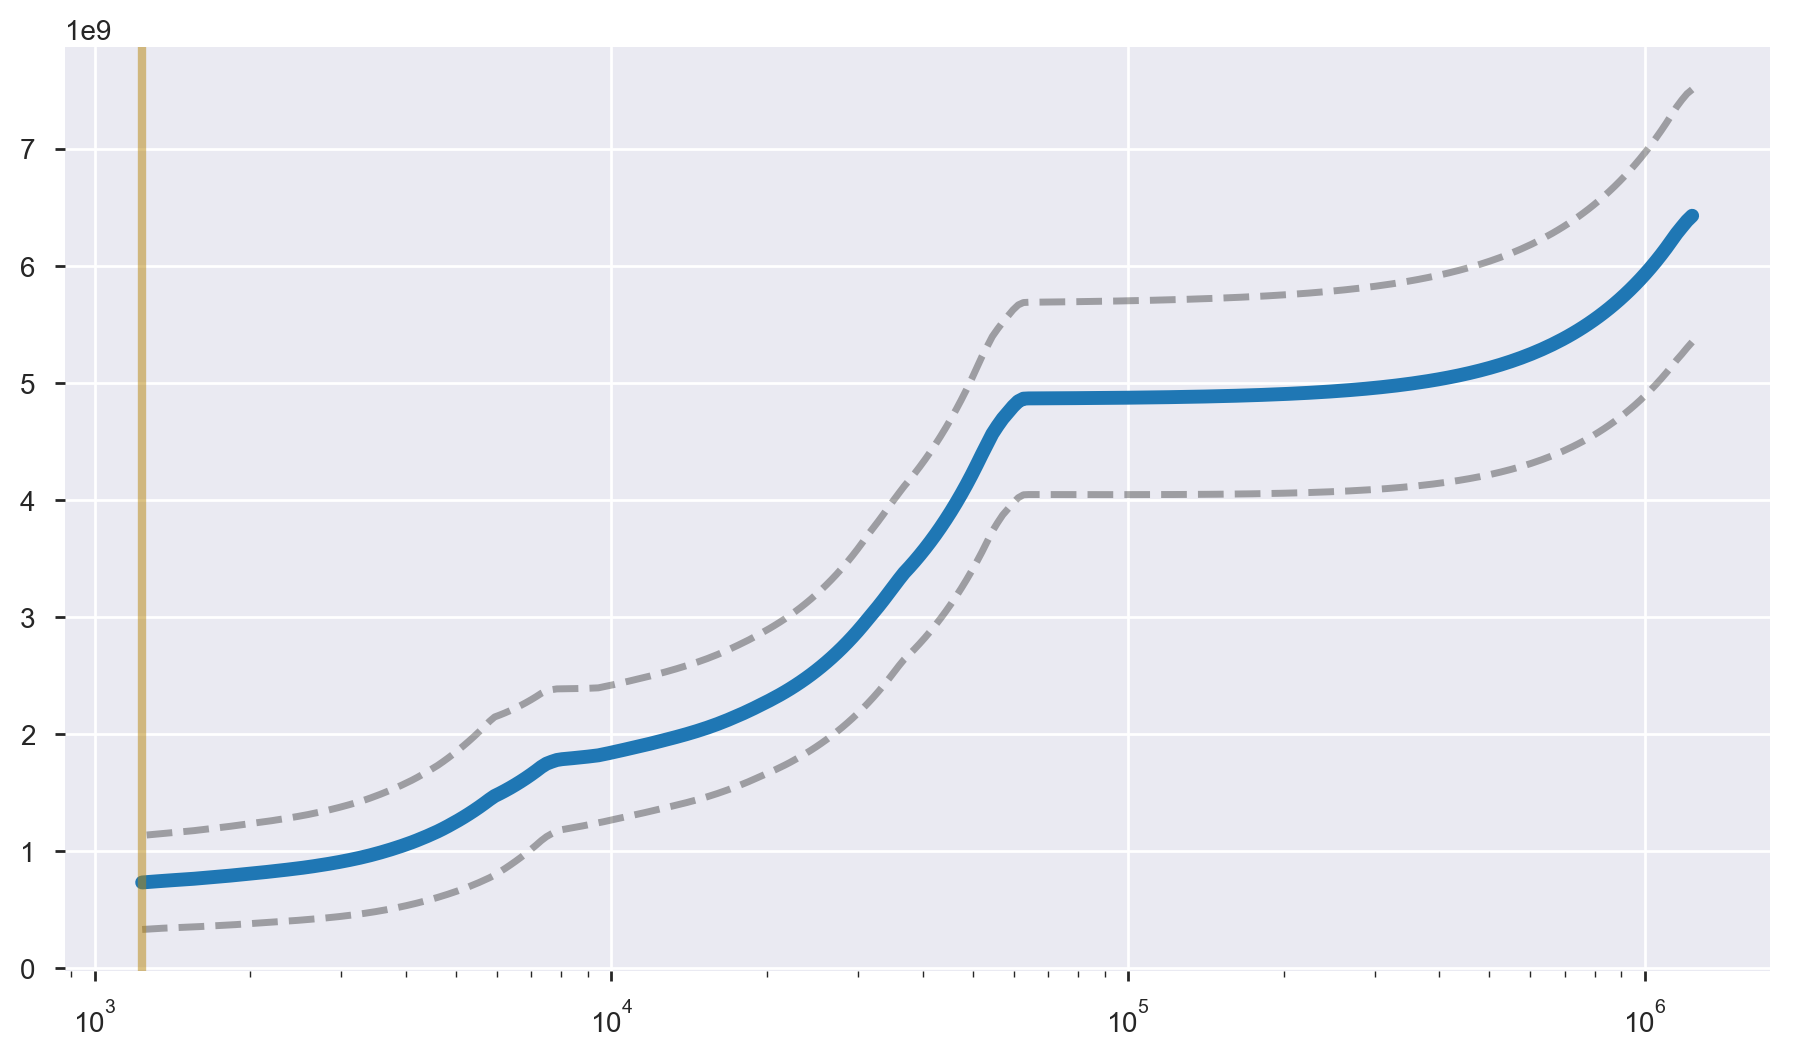

In [38]:
# Plot the mean MSE vs alpha values
fig, ax = plt.subplots(figsize=(11,6))
ln_alphas = np.log(alphas)
ax.plot(alphas, mean_mse, lw=5)
ax.plot(alphas, std_plus, lw=2.5, ls='dashed', c='black', alpha=0.33)
ax.plot(alphas, std_minus, lw=2.5, ls='dashed', c='black', alpha=0.33)
min_mse = np.min(mean_mse)
best_alpha = np.where(mean_mse == min_mse)[0][-1]
ax.axvline(x=alphas[best_alpha], lw=3, c='darkgoldenrod', alpha=0.5)
plt.xscale('log')

plt.show()

In [39]:
print ('The best alpha value was found to be ', lasso_cv.alpha_)

The best alpha value was found to be  1234.969044935501


In [40]:
# Display the features and coefs into a dataframe sorted by magnitude
lasso_feat = pd.DataFrame(dict(feature=X.columns, coef=lasso_cv.coef_, abscoef=np.abs(lasso_cv.coef_)))
lasso_feat.sort_values('abscoef', inplace=True, ascending=False)
lasso_feat[lasso_feat.coef != 0.]

feature           coef        abscoef
53           LogSalePrice  163373.572382  163373.572382
8               ExterQual    6556.978399    6556.978399
95   Neighborhood_NoRidge    5140.888377    5140.888377
5             OverallQual    4406.450647    4406.450647
45                 PoolQC    3766.902152    3766.902152
36             GarageQual   -3642.977647    3642.977647
12           BsmtExposure    2079.099230    2079.099230
11               BsmtCond   -2060.704756    2060.704756
35             GarageArea    1886.932913    1886.932913
282  SaleCondition_Normal   -1772.727152    1772.727152
28            KitchenQual    1589.254040    1589.254040
51              BsmtFinSF    1532.424735    1532.424735
52                TotalSF    1471.986793    1471.986793
26           BedroomAbvGr   -1036.454456    1036.454456
6             OverallCond    -933.844731     933.844731
34             GarageCars     322.118004     322.118004
48          YrAgeWhenSold     140.539659     140.539659
7              MasVnrArea     121.622381     121.622381
250     GarageType_Attchd    -119.967014     119.967014

<div class="alert alert-block alert-info">
<b>Determine which is Best between LASSO, RIDGE & ELASTIC</b>
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Lasso
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Ridge
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;Elastic
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Findings
</div>

In [41]:
ref = [a for a in X_train.columns.values for b in noren_list if a.find(b) == 0]         # No renovations list

myfunc.use_lasso_ridge_elastic(X_train[ref], y_train, X_test[ref], y_test, noren_list, min_score = .7, folds = 5)


 206 features

<function use_lasso at 0x000002090906AAE8> -- use_lasso


....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


LASSO
Optimal Alpha: 163.19180870828055
Score: 0.762 (0.070)

         Feature   Coefficient
29  BedroomAbvGr  49122.072199
48    Age_Garage  13726.882774
17    BsmtFinSF1  13556.001742
28      HalfBath   9463.047934
12      BldgType   8307.215435
49     BsmtFinSF   6671.106427
13    HouseStyle   4251.251118
47     Age_House   4219.913406
23  LowQualFinSF   2832.232214
11    Condition2   2515.962499

y-Predict
Accuracy: 0.7718878753363059 
MSE: 1428859085.3463683 


<function use_ridge at 0x000002090906AB70> -- use_ridge
RIDGE
Optimal Alpha: 8.685113737513529
Score: 0.761 (0.077)

         Feature   Coefficient
29  BedroomAbvGr  31683.426523
17    BsmtFinSF1  15943.526604
48    Age_Garage  13962.608724
9   Neighborhood  11374.655095
28      HalfBath  10716.952918
49     BsmtFinSF  10689.031910
12      BldgType   8965.421046
47     Age_House   8112.574537
13    HouseStyle   5095.447883
39   ScreenPorch   4182.016060

y-Predict
Accuracy: 0.7641633881123063 
MSE: 1477244079.199395 


<fun

In [42]:
# Define the model
best_lasso = Lasso(alpha=lasso_cv.alpha_)

# Fit the model
best_lasso.fit(X_train, y_train)

Lasso(alpha=1234.969044935501, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
# Use the test set on the trained model
best_lasso.score(X_test, y_test)

0.9213148070056232

The R2 score is 0.92 or 92% of the variance in price can be explained. This is a great value.

# Outcome
Lasso seems to bw giving a better accuracy than Ridge or Elastic

Ridge, is next with almost similar accuracy as Lasso

Elastic scored very low

So it this scenario it is best to use Lasso

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

<div class="alert alert-block alert-info">
<b>Calculated Residuals was done on Question 1 </b>
</div>

In [44]:
# Calculate the Residuals for Train & Test
train_residual = y_train.values - lr.predict(X_train)
test_residual  = y_test.values  - lr.predict(X_test)
print ('Train Residual-->', train_residual.shape[0], '\nTest Residual--->', test_residual.shape[0])

Train Residual--> 610 
Test Residual---> 611


<div class="alert alert-block alert-info">
<b>Plot a distribution of the training residuals</b>
</div>

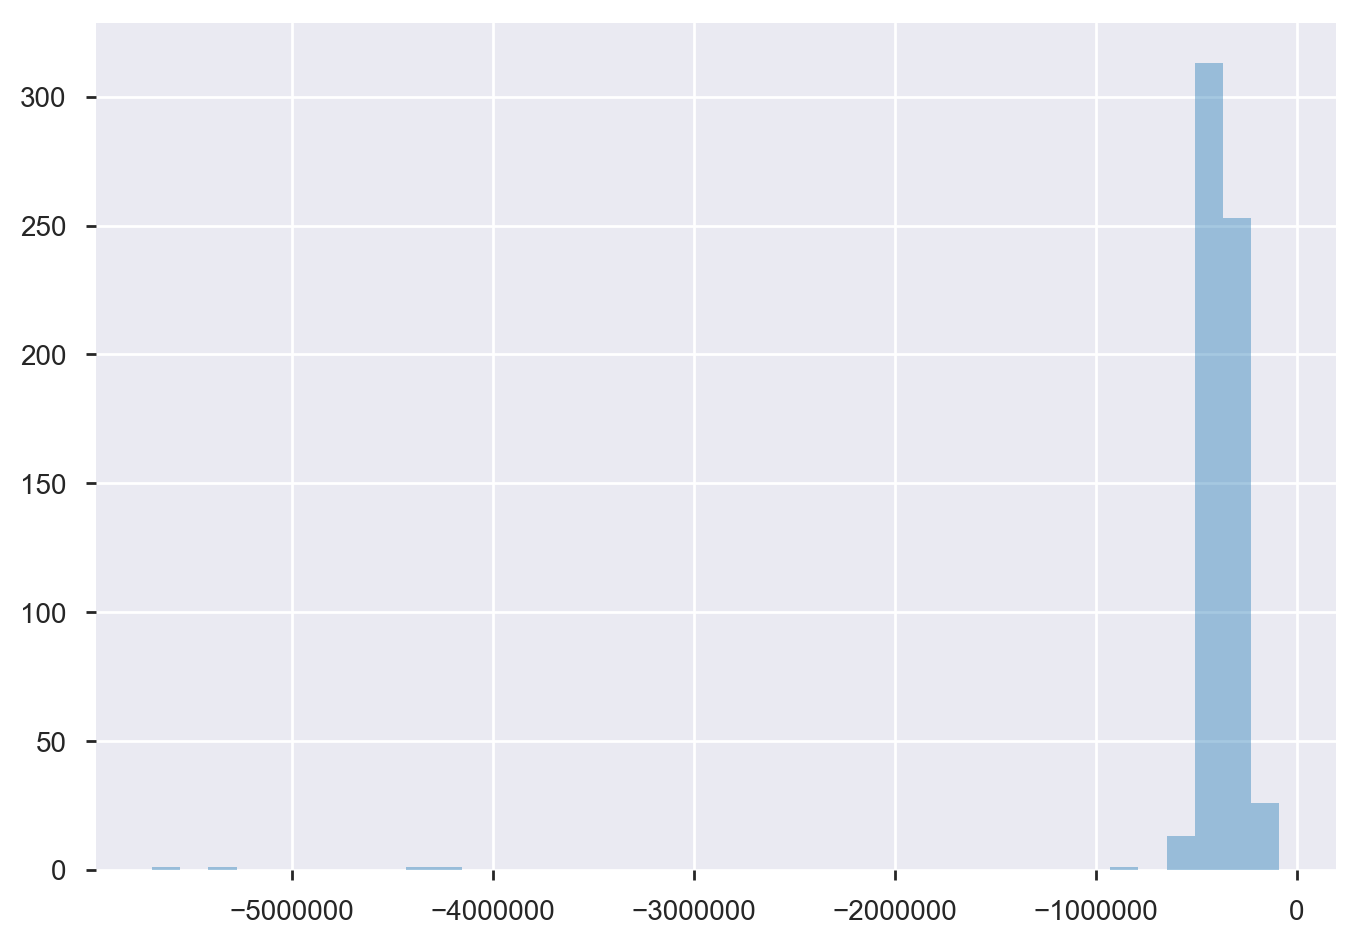

In [45]:
# Plot a distribution of the training residuals
sns.distplot(train_residual, kde=False, bins=40)
plt.show()

In [46]:
print ('The outlier value is ', train_residual.min())

The outlier value is  -5698280.58136588


<div class="alert alert-block alert-info">
<b>Redefine the residuals to have a minumum</b>
</div>

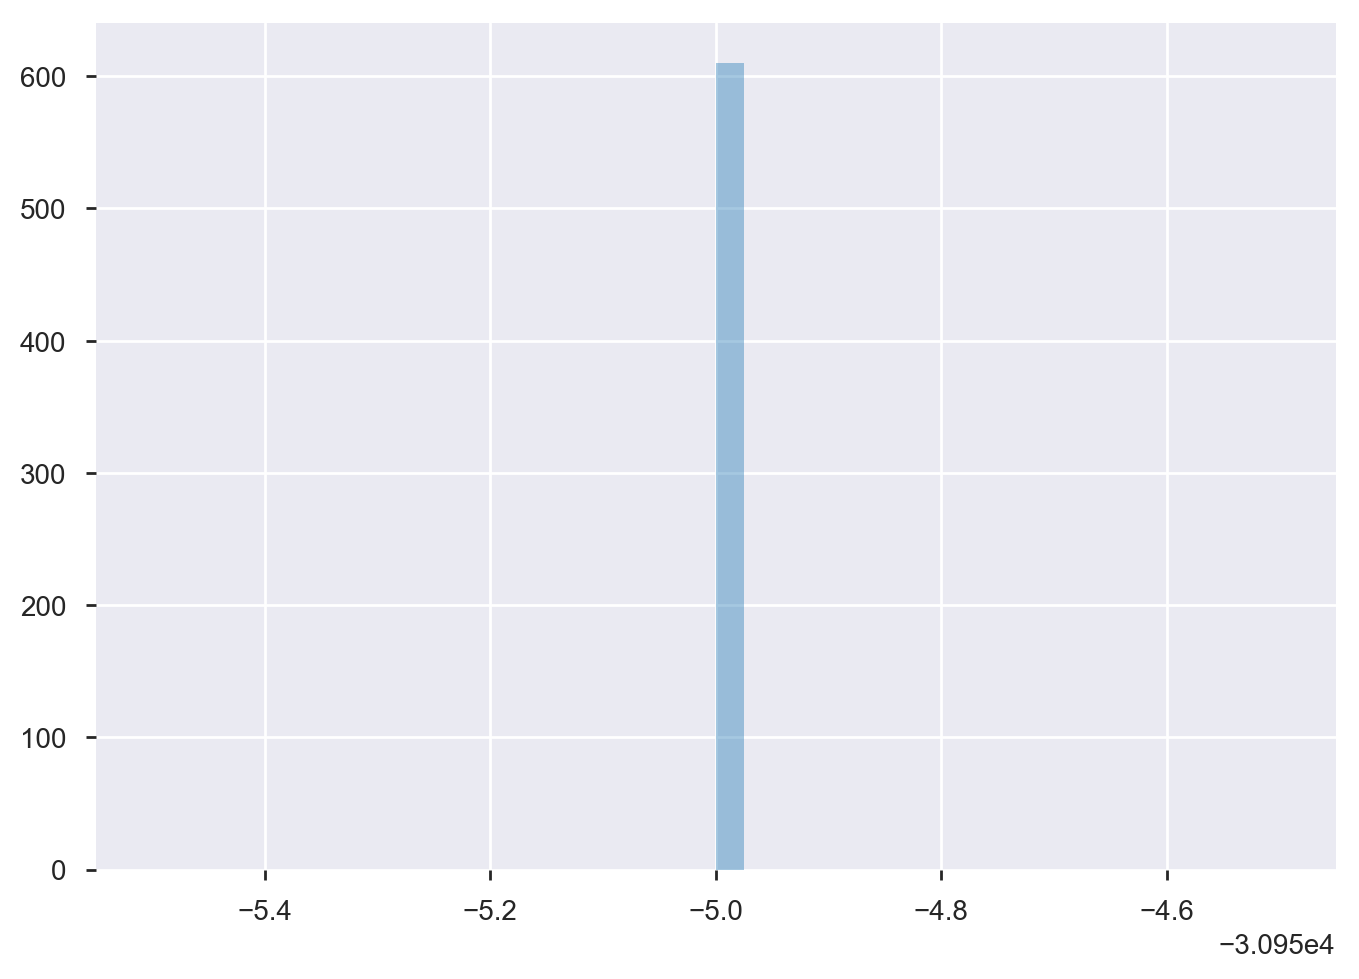

In [47]:
# Redefine the residuals to have a minumum value of -70000
train_residual[train_residual < - 30955] = -30955

# Plot the distribution of the residuals again
sns.distplot(train_residual, kde=False, bins=40)
plt.show()

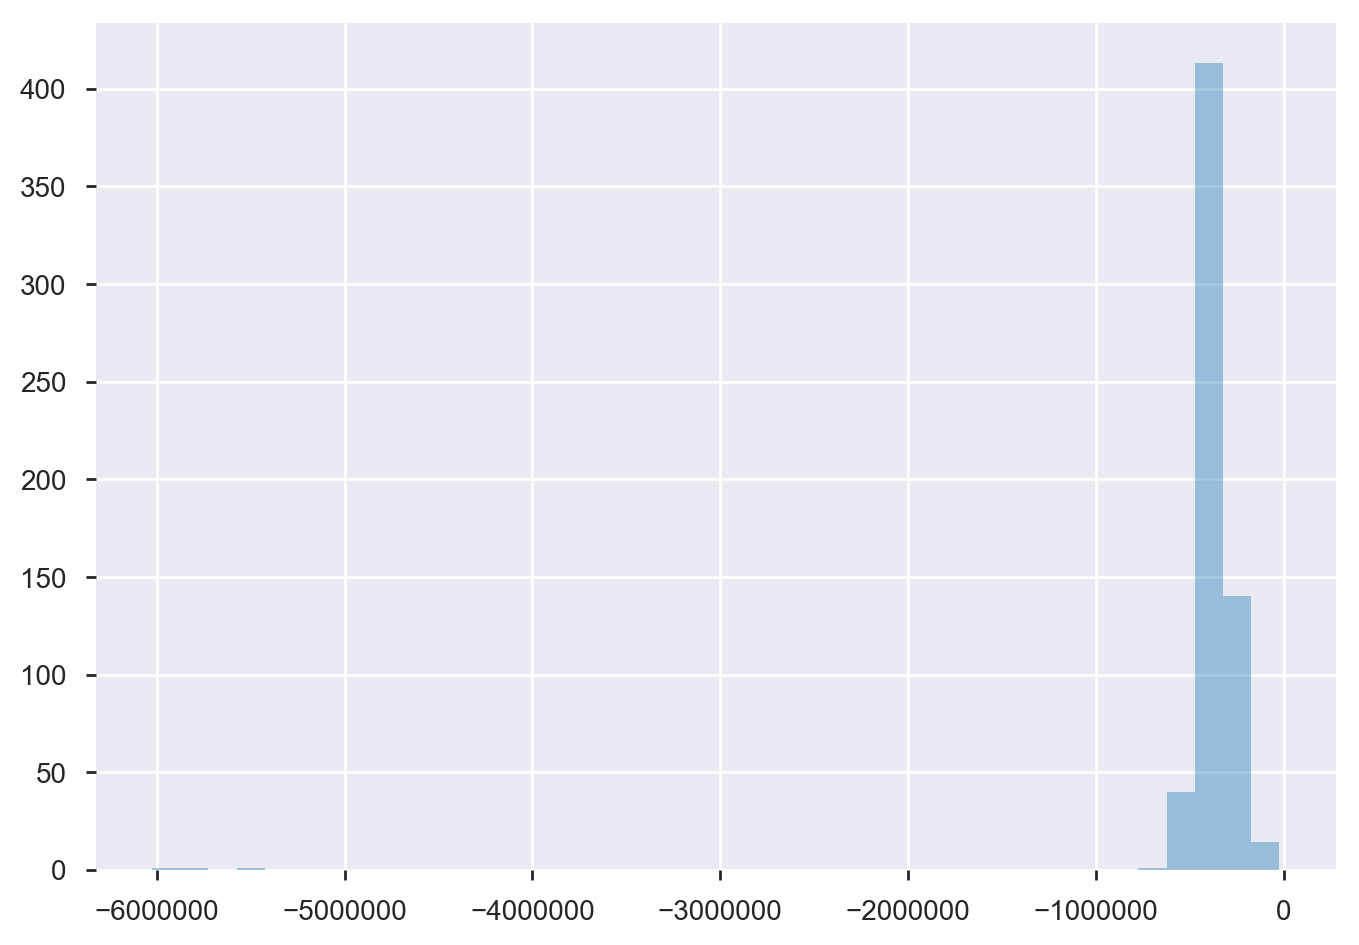

In [48]:
sns.distplot(test_residual, kde=False, bins=40)
plt.show()

In [49]:
renovations = ['ExterCond',
              'BsmtCond','HeatingQC',
              'GarageFinish','GarageCond','PavedDrive',
              'ExterQual','BsmtQual','KitchenQual',
              'FireplaceQu']

In [50]:
renovation_f = '~ ' + ' + '.join(renovations) + ' -1'

In [51]:
# Make a predictor matrix from renovation features
X_ren = patsy.dmatrix(renovation_f, data=df_copy, return_type='dataframe')

# Print the shape
print (X_ren.shape)

(1385, 10)


In [52]:
Target = 2010
X_new_train = df_copy[(df_copy.Age_House < Target)]
X_new_test = df_house[(df_house.YrSold == Target)]
print ('New Train:\t', X_new_train.shape, '\tNew Test:\t', X_new_test.shape )

New Train:	 (1385, 82) 	New Test:	 (164, 286)


In [53]:
# Standardise the X_ren before splitting into training and test sets
ss = StandardScaler()
Xs_ren = ss.fit_transform(X_ren)

In [54]:
X_new_train.shape

(1385, 82)

In [55]:
Xs_ren.shape

(1385, 10)

In [56]:
recent_indices = df_copy.Age_House == 2010
recent_indices.shape

(1385,)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.